In [1]:
# import packages
import glob
from pathlib import Path
import scipy.stats
import os
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pathos.threading import ThreadPool as Pool

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from f_sr_calculation import *

In [6]:
work_dir=Path("/scratch/fransjevanoors/global_sr")
# work_dir=Path("/mnt/u/LSM root zone/global_sr")

### IWU VS IRRIGATED AREA FRACTION

In [15]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
ir = ir[ir>0.05]
ir

br_0001612    0.057811
in_0000114    0.094344
za_0000212    0.091330
in_0000135    0.061861
es_0000529    0.059136
                ...   
in_0000251    0.138393
in_0000005    0.058298
pr_0000017    0.058841
de_0000692    0.076226
cn_0000183    0.058794
Name: ir_mean, Length: 345, dtype: float64

In [5]:
# IWU IRRIGATION DATA
iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
iwu = iwu['iwu_mean_mmday']
iwu = iwu[ir.index]

(0.0, 0.6)

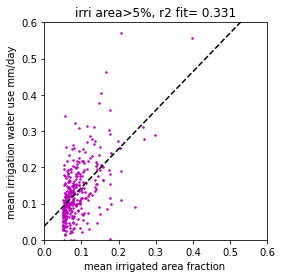

In [8]:
x = ir
y = iwu

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

xf = np.linspace(0,0.6,100)
yf = intercept + slope*xf

fig=plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(x,y,'mo',markersize=1.5)
ax.plot(xf,yf,'k--')
ax.set_xlabel('mean irrigated area fraction ')
ax.set_ylabel('mean irrigation water use mm/day')
ax.set_title(f'irri area>5%, r2 fit= {np.round(r_value**2,3)}')
ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

## 1. Where irrigation?
Use GSIM irrigation data for catchments

In [9]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
np.max(ir)

0.3983825

Text(0.5, 0.98, 'Fraction of irrigated area in catchment')

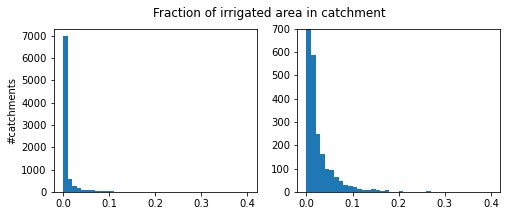

In [10]:
fig = plt.figure(figsize=(8,3))
bins = np.linspace(0,0.4,41)
ax = fig.add_subplot(121)
ax.hist(ir,bins=bins)
ax.set_ylabel(f'#catchments')

ax = fig.add_subplot(122)
ax.hist(ir,bins=bins)
# ax.set_ylabel(f'#catchments')
ax.set_ylim(0,700)

fig.suptitle('Fraction of irrigated area in catchment')

Text(0.5, 1.0, 'Fraction of irrigated area in catchment')

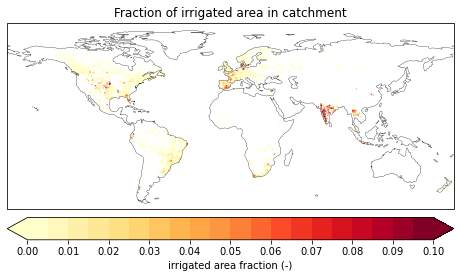

In [11]:
cmap = plt.cm.YlOrRd  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,0.1,21)
bounds2 = np.linspace(0,0.1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=0.1,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional',extend='both', pad=0.02, norm=norm,ticks=bounds2)
ax.set_title(f'Fraction of irrigated area in catchment',size=12)

Text(0.5, 1.0, 'irrigated area fraction >0.05')

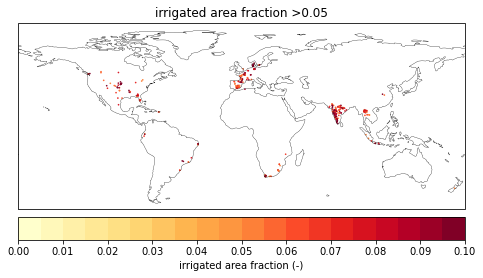

In [12]:
df = df[df.ir_mean>0.05]
# cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,0.1,21)
bounds2 = np.linspace(0,0.1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=0.4,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds2)
ax.set_title(f'irrigated area fraction >0.05',size=12)

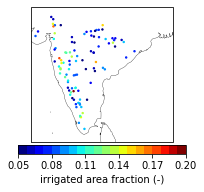

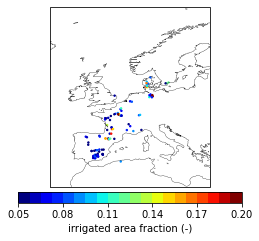

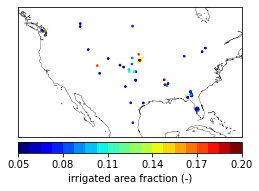

In [13]:
cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0.05,0.2,21)
bounds2 = np.linspace(0.05,0.2,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# INDIA
bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(3,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# EUROPE
bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-15,25)
ax.set_ylim(30,75)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# USA
bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-130,-70)
ax.set_ylim(20,55)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=3,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


In [14]:
# make list of catchments with > 5% irrigation
df = df[df.ir_mean>0.05]
c = df.index.values
np.savetxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',c,fmt='%s')

In [15]:
# IWU IRRIGATION DATA
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)

iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
df2 = pd.concat([df,iwu],axis=1)
df2['iwu_mean_mmyear']=df2['iwu_mean_mmday']*365
df2

,p_mean,ep_mean,q_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,...,pop,nld,clt,lc,lit,st.1,lat,lon,iwu_mean_mmday,iwu_mean_mmyear
de_0000778,4.045309,2.057641,0.842493,7.638991,1.965994,0.337366,24.641665,20.637500,2.86,16.13,...,14377.860,0.241560,Snow,Forest,Unconsolidated sediments,NaN,47.723927,11.933343,0.000000,0.000000
br_0001850,4.186528,2.943133,1.030596,25.107997,1.422473,0.967762,6.181352,4.359281,7.14,72.03,...,201182.800,0.491105,Equatorial,Agriculture,Acid plutonic rocks,NaN,-16.616687,-49.718967,0.009453,3.450305
ca_0003156,1.235331,1.331096,0.017540,3.742158,0.928056,1.003734,43.900205,36.056585,5.33,30.03,...,46994.660,0.315056,Snow,Agriculture,Siliciclastic sedimentary rocks,NaN,49.506681,-103.275867,0.000056,0.020438
br_0001299,3.123837,2.907271,1.032392,24.338485,1.074491,1.257753,6.634216,5.093589,4.47,24.80,...,12372.820,0.411808,Equatorial,No dominant class,Metamorphics,NaN,-17.108293,-39.967427,0.002138,0.780316
br_0001843,4.453621,2.944259,1.377108,24.223189,1.512646,0.877896,6.469796,4.538261,7.15,73.73,...,2077434.000,0.342362,Equatorial,Agriculture,Metamorphics,NaN,-16.539263,-49.184522,0.009306,3.396778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ca_0001384,3.196726,1.852481,2.053996,2.880652,1.725645,0.341004,40.004254,33.168757,2.74,11.63,...,12177.410,NaN,Snow,Forest,Metamorphics,NaN,47.253879,-72.245291,0.000000,0.000000
us_0001647,3.412146,2.749842,2.050785,18.061075,1.240852,0.855017,24.183295,20.816630,4.07,18.73,...,2942.327,0.320770,Warm Temperate,Forest,Metamorphics,NaN,33.018864,-83.604070,0.000000,0.000000
gb_0000044,2.269773,1.157692,1.016338,9.472414,1.960603,0.677501,17.949959,13.999706,3.36,17.43,...,312431.700,0.299489,Warm Temperate,Agriculture,Carbonate sedimentary rocks,NaN,53.261171,-1.396872,0.001495,0.545641
br_0000392,4.171185,3.215613,1.172224,25.953768,1.297166,1.004279,4.744549,3.214524,9.28,87.60,...,1688865.000,NaN,Equatorial,Shrubland,No dominant class,NaN,-12.531370,-47.860721,0.001584,0.578340


Text(0.5, 0.98, 'Mean irrigation water use (mm/year)')

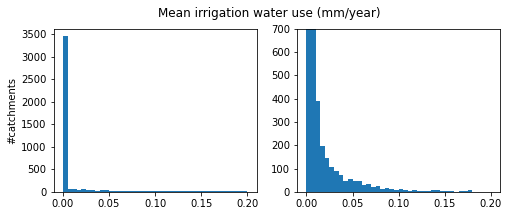

In [16]:
# histogram of IWU data
fig = plt.figure(figsize=(8,3))
bins = np.linspace(0,0.2,41)
ax = fig.add_subplot(121)
ax.hist(df2.iwu_mean_mmyear,bins=bins)
ax.set_ylabel(f'#catchments')

ax = fig.add_subplot(122)
ax.hist(ir,bins=bins)
# ax.set_ylabel(f'#catchments')
ax.set_ylim(0,700)

fig.suptitle('Mean irrigation water use (mm/year)')

Text(0.5, 1.0, 'Mean irrigation water use (mm/year)')

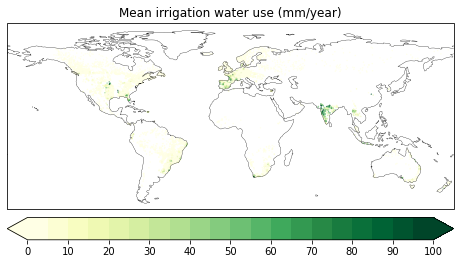

In [17]:
cmap = plt.cm.YlGn  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,100,21)
bounds2 = np.linspace(0,100,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=0.1,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02, norm=norm,ticks=bounds2)
ax.set_title(f'Mean irrigation water use (mm/year)',size=12)

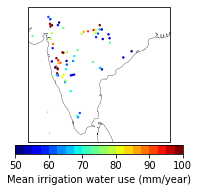

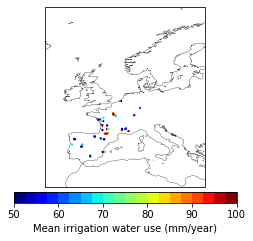

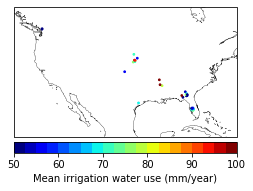

In [18]:
df2 = df2[df2.iwu_mean_mmyear>50]
cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(50,100,21)
bounds2 = np.linspace(50,100,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# INDIA
bounds3 = np.linspace(50,100,6)
fig = plt.figure(figsize=(3,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# EUROPE
# bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-15,25)
ax.set_ylim(30,75)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# USA
# bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-130,-70)
ax.set_ylim(20,55)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=3,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


## 2. Sd calculation for irrigation catchments

In [37]:
def sd_initial(df, si_0, si_max, q_mean,s):
    """
    calculate timeseries of storage deficits

    df:       pandas dataframe, daily values for P, and Ep and date_start and date_end (defined in (2))
    si_0:     int, initial interception storage = 0
    si_max:   int, maximum interception storage = 2.5 mm
    q_mean:   df, catchment mean discharge

    returns: 
    b:        int, 1>non closing water balance, 0>closing water balance
    df:       pandas dataframe, daily values for P, Pe, Ep, Ei, Et, Sd
    """
    
    # add year if the start date is earlier than the timeseries (e.g. startdate 02-01, timeseries starts 02-28) 
    if df.index[0]>df.date_start[0]:
        df.date_start = df.date_start[0] + relativedelta(years=1)

    # select time period of interest
    df = df.loc[df.date_start[0]:df.date_end[0]]

    # add empty columns for interception storage calculation
    df.loc[:,'Si_1'] = np.nan
    df.loc[:,'Pe'] = np.nan
    df.loc[:,'Si_2'] = np.nan
    df.loc[:,'Ei'] = np.nan
    df.loc[:,'Si_3'] = np.nan
    df.loc[:,'Et'] = np.nan
    df.loc[:,'Sd'] = np.nan
    df.loc[:,'se'] = np.nan

    # convert to numpy arrays (to speed up calculations)
    p = np.array(df.p.values)
    ep = np.array(df.ep.values)

    if (s==1):
        pl = np.array(df.pl.values)
        pm = np.array(df.pm.values)

    si1 = np.zeros(len(df))
    pe = np.zeros(len(df))
    pef = np.zeros(len(df))
    si2 = np.zeros(len(df))
    ei = np.zeros(len(df))
    si3 = np.zeros(len(df))
    et = np.zeros(len(df))
    sd = np.zeros(len(df))
    se = np.zeros(len(df))

    if (s==1): # snow
        #calculate interception storage and effective precipitation for all timesteps
        for l in range(1,len(si1)):
            # first timestep l=0
            si1[0] = pl[0] + si_0
            pef[0] = max(0,si1[0]-si_max)
            si2[0] = si1[0] - pef[0]
            ei[0] = min(si2[0],ep[0])
            si3[0] = max(0,si2[0]-ei[0])

            pe[0] = pef[0]+pm[0]

            # timestep 1 to end
            si1[l] = pl[l] + si3[l-1]
            pef[l] = max(0,si1[l]-si_max)
            si2[l] = si1[l] - pef[l]
            ei[l] = min(si2[l],ep[l])
            si3[l] = max(0,si2[l]-ei[l])

            pe[l] = pef[l]+pm[l]

    else: # no snow
        #calculate interception storage and effective precipitation for all timesteps
        for l in range(1,len(si1)):
            # first timestep l=0
            si1[0] = p[0] + si_0
            pe[0] = max(0,si1[0]-si_max)
            si2[0] = si1[0] - pe[0]
            ei[0] = min(si2[0],ep[0])
            si3[0] = max(0,si2[0]-ei[0])

            # timestep 1 to end
            si1[l] = p[l] + si3[l-1]
            pe[l] = max(0,si1[l]-si_max)
            si2[l] = si1[l] - pe[l]
            ei[l] = min(si2[l],ep[l])
            si3[l] = max(0,si2[l]-ei[l])

    #calculate Et from the catchment water balance (Et = Pe-Q)
    Pe_mean = np.mean(pe)
    EP_mean = np.mean(ep)
    Q_mean = q_mean #q_mean from other file than p and e because yearly timeseries
    Et_mean = Pe_mean - Q_mean
    
    #check if water balance is ok
    if Et_mean<0: # if this is the case, it is not possible to calculate sd
        b = 1 # wb not ok
        sd[:] = np.nan
        et[:]=np.nan
    else:
        b = 0 # wb ok
        #calculate daily Et (EP(daily)*(Et_sum/EP_sum)) and Sd
        for l in range(1,np.size(df.index)):
            # sd for timestep 0
            et[0] = ep[0]/EP_mean * Et_mean
            sd[0] = min(0,pe[0] - et[0])

            # sd for timestep 1 - end
            et[l] = ep[l]/EP_mean * Et_mean
            sd[l] = min(0,sd[l-1]+pe[l]-et[l])

            if (sd[l]==0):
                se[l] = pe[l]-et[l]
    
    # add numpy arrays to dataframe
    df.Si_1 = si1
    df.Si_2 = si2
    df.Si_3 = si3
    df.Pe = pe
    df.Ei = ei
    df.Sd = sd
    df.Et = et
    df.se = se
                
    return b, df

In [38]:
def run_sd_calculation(catch_id, pep_dir, q_dir, out_dir,snow_id_list, irri_id_list,snow_dir,work_dir):
    """
    run calculation of storage deficits (1)
    
    catch_id:    str, catchment id
    pep_dir:     str, dir, directory of P and Ep timeseries
    q_dir:       str, dir, directory of Q timeseries
    out_dir:     str, dir, output directory
    
    returns: out:sd timeseries, stores out dataframe (Sd calculation) as csv
    """
    
    if catch_id in snow_id_list:
        s = 1 # snow is yes
        f_pep = glob.glob(f'{snow_dir}/{catch_id}*.csv')

    else:
        s = 0 # snow is no
        # get P Ep and Q files for catch id
        f_pep = glob.glob(f'{pep_dir}/{catch_id}*.csv')

    # read q df
    f_q = glob.glob(f'{q_dir}/{catch_id}*.csv')

    # read files as dataframes
    q_ts = pd.read_csv(f_q[0],index_col=0)
    q_ts.index = pd.to_datetime(q_ts.index)
    pep_ts = pd.read_csv(f_pep[0],index_col=0)
    pep_ts.index = pd.to_datetime(pep_ts.index)

    if (s==1): #snow
        # convert to monthly dataframes
        df_monthly = pd.DataFrame(index=pd.date_range(pep_ts.index[0],pep_ts.index[-1],freq='M'), columns=['p','ep','ps','pm','pl'])
        df_monthly[['p','ep','ps','pm','pl']] = pep_ts[['p','ep','ps','pm','pl']].groupby(pd.Grouper(freq="M")).sum()

        # calculate start hydroyear -> month after on average the wettest month
        df_monthly_mean = df_monthly.groupby([df_monthly.index.month]).mean()
        df_monthly_mean['liq'] = df_monthly_mean['pm'] + df_monthly_mean['pl']
        wettest_month = (df_monthly_mean['liq']-df_monthly_mean['ep']).idxmax()
        hydro_year_start_month = wettest_month+1
        if hydro_year_start_month==13:
            hydro_year_start_month=1

    else: # no snow
        # convert to monthly dataframes
        df_monthly = pd.DataFrame(index=pd.date_range(pep_ts.index[0],pep_ts.index[-1],freq='M'), columns=['p','ep'])
        df_monthly[['p','ep']] = pep_ts[['p','ep']].groupby(pd.Grouper(freq="M")).sum()

        # calculate start hydroyear -> month after on average the wettest month
        df_monthly_mean = df_monthly.groupby([df_monthly.index.month]).mean()
        wettest_month = (df_monthly_mean['p']-df_monthly_mean['ep']).idxmax()
        hydro_year_start_month = wettest_month+1
        if hydro_year_start_month==13:
            hydro_year_start_month=1

    # find the start and end date for the sr calculation based on P, Ep, Q timeseries and hydroyear
    p_ep_start_year = pep_ts.index.year[0]
    q_start_year = int(q_ts.index[0].year)
    p_ep_end_year = pep_ts.index.year[-1]
    q_end_year = int(q_ts.index[-1].year)

    # test if timeseries have overlap -> if not don't continue the sd calculation
    if q_start_year>p_ep_end_year:
        a=1
    elif p_ep_start_year>q_end_year:
        a=1
    else:
        a=0
        start_year = max(q_start_year,p_ep_start_year)
        end_year = min(q_end_year,p_ep_end_year)
        start_date = datetime(start_year,hydro_year_start_month,1)
        end_date = datetime(end_year,hydro_year_start_month,1)
        end_date = end_date - timedelta(days=1)

        #calculate mean Q for startdate enddate timeseries
        q_mean = q_ts.loc[start_date:end_date,'Q'].mean()

        if (s==1): # snow
            # prepare input dataframe for sd calculation
            sd_input = pd.DataFrame(index=pd.date_range(start_date,end_date,freq='d'), columns=['p','ep','ps','pm','pl','date_start','date_end'])
            sd_input[['p','ep','ps','pm','pl']] = pep_ts[['p','ep','ps','pm','pl']]
            sd_input[['date_start','date_end']] = start_date, end_date
            si_0 = 0 #initial interception storage
            si_max = 2.5 #maximum interception storage

        else: # no snow
            # prepare input dataframe for sd calculation
            sd_input = pd.DataFrame(index=pd.date_range(start_date,end_date,freq='d'), columns=['p','ep','date_start','date_end'])
            sd_input[['p','ep']] = pep_ts[['p','ep']]
            sd_input[['date_start','date_end']] = start_date, end_date
            si_0 = 0 #initial interception storage
            si_max = 2.5 #maximum interception storage

        # run sd calculation
        b = sd_initial(sd_input, si_0, si_max, q_mean,s)[0] #b==0: closing wb, b==1: non-closing wb > no sd calculation
        if b==0:      
            # save output dataframe from sd calculation
            out = sd_initial(sd_input, si_0, si_max, q_mean,s)[1]
            
            if catch_id in irri_id_list:
                irri = irrigation_sd(out,catch_id,work_dir)
                out = irri[0] 
                se_out = irri[1]
                f = irri[2]
                se_out.to_csv(f'{out_dir}/irri/se/{catch_id}_f{f}.csv')
            
                out.to_csv(f'{out_dir}/irri/sd/{catch_id}_f{f}.csv')
            else: 
                out.to_csv(f'{out_dir}/{catch_id}.csv')
            return out

In [39]:
def irrigation_sd(df,catch_id,work_dir):
    s = df
    split_dates = []
    start_date = df.index[0]
    split_dates.append(start_date)
    se_l = []
    se_used = []
    ldd_l = []
    lde_l = []
    days_l = []
    s2 = s #make new dataframe, copy of s which is output of initial sd calculation
    s2['p_irri']=s.Pe #set initially p irri to Pe
    s2['sd2']=s.Sd
    s2['se2']=s.se
    iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed/monthly_mean/{catch_id}.csv',index_col=0)
    iwu_mean = iwu.mean().values[0]*365

    years=len(np.unique(s.index.year)) #count years
    for i in range(years):
        ss = s2.iloc[i*365:(i*365)+365] #select 1 year
        min_date = ss[ss.Sd==ss.Sd.min()].index.values[0] #select date where Sd minimizes
        split_dates.append(min_date) #append first date to split_dates list
        sp = s2.loc[split_dates[i]:split_dates[i+1]]
        se_sum = sp.se2.sum() #sum se from start date to date with min Sd
        se_l.append(se_sum)

        # find last date of Se>0 BEFORE min date = first day deficit
        sss = ss.loc[:min_date]
        if (len(sss.se[sss.se>0])>0):
            lde = sss.se[sss.se>0].index[-1]
        else:
            lde = sss.index[0]   
            
        # find first day of deficit Sd<0 AFTER min date = last day deficit
        sss = ss.loc[min_date:]
        if (len(sss.Sd[sss.Sd<0])>0):
            ldd = sss[sss.Sd<0].index[-1]
        else:
            ldd = sss.Sd.index[-1]
            
        ldd_l.append(ldd)
        lde_l.append(lde)
        dd = ss.loc[lde+timedelta(days=1):ldd] # select from start of deficit until end of deficit period
        days = len(dd) # length of deficit period = length of irrigation period
        days_l.append(days)

        f = 0.25 # this is just a random assumption -> use IWU and irri-area to estimate f
        
        # if (se_sum>0):
        #     f = iwu_mean/se_sum
        # else: 
        #     f=0
        # if (f>1):
        #     f=1
        # print(f)
        irri = f * se_sum/days # calculate the irrigation fraction per day, equally distributed over the deficit period
        se_used.append(f*se_sum)

        # add irri to p
        p_irri = dd['Pe'] + irri # preciptiation+irrigation
        dfp2 = pd.DataFrame(index=ss.index, columns=['p_irri'])
        dfp2.p_irri = p_irri
        dfp2 = dfp2.fillna(-1)
        dfp2.p_irri.loc[dfp2[dfp2.p_irri<0].index] = ss.Pe.loc[dfp2[dfp2.p_irri<0].p_irri.index] # set nan values in dfp2 (no irrigation) to original p values
        ss['p_irri'] = dfp2['p_irri'] # add p_irri to ss dataframe
        s2.p_irri.iloc[i*365:(i*365)+365] = ss['p_irri'] #update p_irri in s2

        #update sd and se in full timeseries from year -> end
        for l in range(i*365,len(s2)):
            if (i==0)&(l==0):
                s2['sd2'].iloc[l]=0
            else:
                s2['sd2'].iloc[l] = min(0,s2['sd2'].iloc[l-1]+s2['p_irri'][l]-s2['Et'][l])
            if (s2['sd2'].iloc[l]==0):
                s2['se2'].iloc[l] = s2.p_irri[l]-s2.Et[l]

    # make irrigation dataframe
    df_se = pd.DataFrame(index=range(len(se_used)), columns=['start_date_se','end_date_se','start_date_irri','end_date_irri','se','f','se_used','iwu_mean','days_irri'])
    df_se['se'] = se_l
    df_se['se_used'] = se_used
    df_se['f'] = [f] * len(df_se.index)
    df_se['start_date_se'] = split_dates[:-1]
    df_se['end_date_se'] = split_dates[1:]
    df_se['start_date_irri'] = lde_l
    df_se['end_date_irri'] = ldd_l
    df_se['days_irri'] = days_l
    df_se['iwu_mean'] = [iwu_mean] * len(df_se.index)
    
    return(s2, df_se, f)


In [40]:
def run_sd_calculation_parallel(
    catch_id_list=list,
    pep_dir_list=list,
    q_dir_list=list,
    out_dir_list=list,
    snow_id_list=list,
    irri_id_list=list,
    snow_dir_list=list,
    work_dir_list=list,
    # threads=None
    threads=200
):
    """
    Runs function area_weighted_shapefile_rasterstats in parallel.

    catch_list:  str, list, list of catchment ids
    pep_dir_list:     str, list, list of input folders for pep forcing data
    q_dir_list:   str, list, list of folder with q timeseries
    output_dir_list: str, list, list of output directories
    snow_id_list: str,list, list of catchments with snow
    snow_dir_list: str, list, list of snow timeseries directory
    threads:         int,       number of threads (cores), when set to None use all available threads

    Returns: None
    """
    # Set number of threads (cores) used for parallel run and map threads
    if threads is None:
        pool = Pool()
    else:
        pool = Pool(nodes=threads)
    # Run parallel models
    results = pool.map(
        run_sd_calculation,
        catch_id_list,
        pep_dir_list,
        q_dir_list,
        out_dir_list,
        snow_id_list,
        irri_id_list,
        snow_dir_list,
        work_dir_list
    )

In [5]:
pep_dir = f'{work_dir}/output/forcing_timeseries/processed/daily'
q_dir = f'{work_dir}/output/q_timeseries_selected'
out_dir = f'{work_dir}/output/sr_calculation/sd_catchments'
snow_ids = np.genfromtxt(f'{work_dir}/output/snow/catch_id_list_snow_t_and_p.txt',dtype='str')
snow_dir = f'{work_dir}/output/snow/timeseries'
irri_ids = np.loadtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype=str)

catch_id_list = irri_ids[0:3]
pep_dir_list = [pep_dir] * len(catch_id_list)
q_dir_list = [q_dir] * len(catch_id_list)
out_dir_list = [out_dir] * len(catch_id_list)
snow_id_list = [snow_ids] * len(catch_id_list)
snow_dir_list = [snow_dir] * len(catch_id_list)
irri_id_list = [irri_ids] * len(catch_id_list)
work_dir_list = [work_dir] * len(catch_id_list)

run_sd_calculation_parallel(catch_id_list,pep_dir_list,q_dir_list,out_dir_list,snow_id_list,irri_id_list,snow_dir_list,work_dir_list)

In [6]:
irri_ids = np.loadtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype=str)


In [56]:
catch_id = dif[3]

pep_dir = f'{work_dir}/output/forcing_timeseries/processed/daily'
q_dir = f'{work_dir}/output/q_timeseries_selected'
out_dir = f'{work_dir}/output/sr_calculation/sd_catchments'
snow_id_list = np.genfromtxt(f'{work_dir}/output/snow/catch_id_list_snow_t_and_p.txt',dtype='str')
snow_dir = f'{work_dir}/output/snow/timeseries_gswp'
irri_id_list = np.loadtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype=str)

In [57]:
run_sd_calculation(catch_id, pep_dir, q_dir, out_dir,snow_id_list, irri_id_list,snow_dir,work_dir)

,p,ep,ps,pm,pl,date_start,date_end,Si_1,Pe,Si_2,Ei,Si_3,Et,Sd,se,p_irri,sd2,se2
1981-05-01,0.102171,2.379763,0.0,0.0,0.102171,1981-05-01,2010-04-30,0.102171,0.000000,0.102171,0.102171,0.000000,1.794368,-1.794368,0.0,0.000000,0.000000,-1.794368
1981-05-02,0.008362,2.398803,0.0,0.0,0.008362,1981-05-01,2010-04-30,0.008362,0.000000,0.008362,0.008362,0.000000,1.808725,-3.603093,0.0,0.000000,-1.808725,0.000000
1981-05-03,0.028934,1.484377,0.0,0.0,0.028934,1981-05-01,2010-04-30,0.028934,0.000000,0.028934,0.028934,0.000000,1.119237,-4.722331,0.0,0.000000,-2.927962,0.000000
1981-05-04,0.242860,1.418584,0.0,0.0,0.242860,1981-05-01,2010-04-30,0.242860,0.000000,0.242860,0.242860,0.000000,1.069629,-5.791959,0.0,0.000000,-3.997591,0.000000
1981-05-05,0.000000,2.618808,0.0,0.0,0.000000,1981-05-01,2010-04-30,0.000000,0.000000,0.000000,0.000000,0.000000,1.974611,-7.766570,0.0,0.000000,-5.972202,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-04-26,2.425383,1.770068,0.0,0.0,2.425383,1981-05-01,2010-04-30,2.579878,0.079878,2.500000,1.770068,0.729932,1.334652,-64.887099,0.0,0.079878,-52.211455,0.000000
2010-04-27,0.324482,2.277038,0.0,0.0,0.324482,1981-05-01,2010-04-30,1.054414,0.000000,1.054414,1.054414,0.000000,1.716913,-66.604012,0.0,0.000000,-53.928368,0.000000
2010-04-28,0.219664,2.158282,0.0,0.0,0.219664,1981-05-01,2010-04-30,0.219664,0.000000,0.219664,0.219664,0.000000,1.627369,-68.231382,0.0,0.000000,-55.555737,0.000000
2010-04-29,17.841282,1.598428,0.0,0.0,17.841282,1981-05-01,2010-04-30,17.841282,15.341282,2.500000,1.598428,0.901572,1.205233,-54.095333,0.0,15.341282,-41.419688,0.000000


In [58]:
if catch_id in snow_id_list:
    s = 1 # snow is yes
    f_pep = glob.glob(f'{snow_dir}/{catch_id}*.csv')

else:
    s = 0 # snow is no
    # get P Ep and Q files for catch id
    f_pep = glob.glob(f'{pep_dir}/{catch_id}*.csv')

# read q df
f_q = glob.glob(f'{q_dir}/{catch_id}*.csv')

# read files as dataframes
q_ts = pd.read_csv(f_q[0],index_col=0)
q_ts.index = pd.to_datetime(q_ts.index)
pep_ts = pd.read_csv(f_pep[0],index_col=0)
pep_ts.index = pd.to_datetime(pep_ts.index)

In [59]:
s

1

In [60]:
catch_id in snow_id_list

True

## TEST IRRIGATION AREA FRACTION  * F

In [7]:
# check which catchments are missing
catch_list = np.genfromtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype='str')[:]
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sd/*2.2ia.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-11] # remove .year extension
    el_id_list.append(f)
dif = list(set(catch_list) - set(el_id_list))
len(dif)

18

In [22]:
md_05 = []
md_12 = []
md_0 = []
md_08 = []
md_1 = []
md_15 = []
md_2 = []
md_25 = []
md_22 = []
md_3 = []
md_iwu = []

md_08_rel = []
md_05_rel = []
md_12_rel = []
md_0_rel = []
md_1_rel = []
md_15_rel = []
md_2_rel = []
md_25_rel = []
md_22_rel = []
md_3_rel = []
md_iwu_rel = []

iwu=[]

ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

for catch_id in el_id_list:
#     f=0.5
#     d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
#     md_05.append(d.se_used.mean() - d.iwu_mean.mean())
#     if (d.iwu_mean.mean()>0):
#         md_05_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
#     else:
#         md_05_rel.append(np.nan)
    
#     f=0.8
#     d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
#     md_08.append(d.se_used.mean() - d.iwu_mean.mean())
#     if (d.iwu_mean.mean()>0):
#         md_08_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
#     else:
#         md_08_rel.append(np.nan)
    
    f=1.0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_1.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_1_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_1_rel.append(np.nan)
    
    # f=1.2
    # d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    # md_12.append(d.se_used.mean() - d.iwu_mean.mean())
    # if (d.iwu_mean.mean()>0):
    #     md_12_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    # else:
    #     md_12_rel.append(np.nan)
        
    # f=1.5
    # d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    # md_15.append(d.se_used.mean() - d.iwu_mean.mean())
    # if (d.iwu_mean.mean()>0):
    #     md_15_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    # else:
    #     md_15_rel.append(np.nan)
        
    f=2.0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_2.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_2_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_2_rel.append(np.nan)
        
    f=2.2
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_22.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_22_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_22_rel.append(np.nan)
        
    f=2.5
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_25.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_25_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_25_rel.append(np.nan)
    
#     f=3.0
#     d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
#     md_3.append(d.se_used.mean() - d.iwu_mean.mean())
#     if (d.iwu_mean.mean()>0):
#         md_3_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
#     else:
#         md_3_rel.append(np.nan)
    
    f=0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_0.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_0_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_0_rel.append(np.nan)
        
    f='iwu'
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_iwu.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_iwu_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_iwu_rel.append(np.nan)
        
    iwu.append(d.iwu_mean.mean())

In [23]:
df = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f0.5ia','f0.8ia','f1.0ia','f1.2ia','f1.5ia','f2.0ia','f2.2ia','f2.5ia','f3.0ia','fiwu'])
df['f0'] = md_0
# df['f0.5ia'] = md_05
# df['f0.8ia'] = md_08
df['f1.0ia'] = md_1
# df['f1.2ia'] = md_12
# df['f1.5ia'] = md_15
df['f2.0ia'] = md_2
df['f2.2ia'] = md_22
df['f2.5ia'] = md_25
# df['f3.0ia'] = md_3
df['fiwu'] = md_iwu

dfr = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f0.5ia','f0.8ia','f1.0ia','f1.2ia','f1.5ia','f2.0ia','f2.2ia','f2.5ia','f3.0ia','fiwu'])
dfr['f0'] = md_0_rel
# dfr['f0.5ia'] = md_05_rel
# dfr['f0.8ia'] = md_08_rel
dfr['f1.0ia'] = md_1_rel
# dfr['f1.2ia'] = md_12_rel
# dfr['f1.5ia'] = md_15_rel
dfr['f2.0ia'] = md_2_rel
dfr['f2.2ia'] = md_22_rel
dfr['f2.5ia'] = md_25_rel
# dfr['f3.0ia'] = md_3_rel
dfr['fiwu'] = md_iwu_rel

df['irri_areaf'] = ir
dfr['irri_areaf'] = ir
df['irri_area'] = ir*ar
dfr['irri_area'] = ir*ar

,median,mean,std,q75-q25
f0,-42.41,-47.54,27.26,33.12
f0.5ia,NaN,NaN,NaN,NaN
f0.8ia,NaN,NaN,NaN,NaN
f1.0ia,-22.21,-18.96,38.95,31.56
f1.2ia,NaN,NaN,NaN,NaN
f1.5ia,NaN,NaN,NaN,NaN
f2.0ia,-0.02,15.79,74.25,55.16
f2.2ia,4.64,23.63,82.86,63.04
f2.5ia,10.70,35.89,96.62,76.07
f3.0ia,NaN,NaN,NaN,NaN


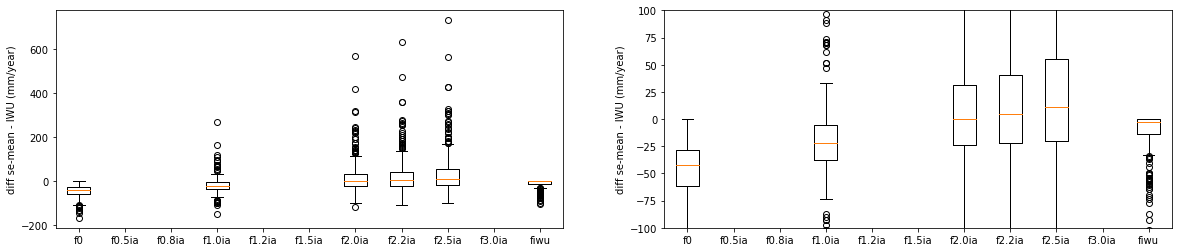

In [24]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(df.iloc[:,1:-2])
ax.set_xticklabels(df.iloc[:,1:-2].columns)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

ax = fig.add_subplot(122)
ax.boxplot(df.iloc[:,1:-2])
ax.set_xticklabels(df.iloc[:,1:-2].columns)
ax.set_ylim(-100,100)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

d = pd.DataFrame(index=df.iloc[:,1:-2].columns, columns=['median','mean','std'])
d['median']=np.round(df.iloc[:,1:-2].median(),2)
d['mean']=np.round(df.iloc[:,1:-2].mean(),2)
d['std']=np.round(df.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((df.iloc[:,1:-2].quantile(0.75) - df.iloc[:,1:-2].quantile(0.25)),2)

d

,median,mean,std,q75-q25
f0,-100.00,-100.00,0.00,33.12
f0.5ia,NaN,NaN,NaN,NaN
f0.8ia,NaN,NaN,NaN,NaN
f1.0ia,-54.15,51.60,1319.61,31.56
f1.2ia,NaN,NaN,NaN,NaN
f1.5ia,NaN,NaN,NaN,NaN
f2.0ia,-0.10,226.92,2810.16,55.16
f2.2ia,11.84,265.27,3131.36,63.04
f2.5ia,30.10,324.70,3626.91,76.07
f3.0ia,NaN,NaN,NaN,NaN


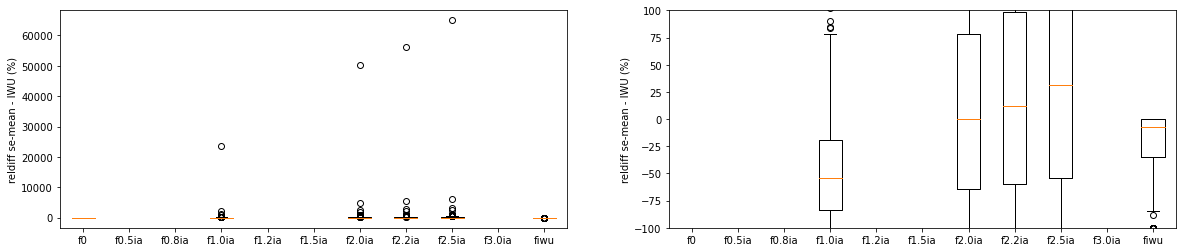

In [25]:
# boxplots of relative errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(dfr.iloc[:,1:-2])
ax.set_xticklabels(dfr.iloc[:,1:-2].columns)
ax.set_ylabel('reldiff se-mean - IWU (%)')

ax = fig.add_subplot(122)
ax.boxplot(dfr.iloc[:,1:-2])
ax.set_xticklabels(dfr.iloc[:,1:-2].columns)
ax.set_ylim(-100,100)
ax.set_ylabel('reldiff se-mean - IWU (%)')

d = pd.DataFrame(index=dfr.iloc[:,1:-2].columns, columns=['median','mean','std'])
d['median']=np.round(dfr.iloc[:,1:-2].median(),2)
d['mean']=np.round(dfr.iloc[:,1:-2].mean(),2)
d['std']=np.round(dfr.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((df.iloc[:,1:-2].quantile(0.75) - df.iloc[:,1:-2].quantile(0.25)),2)

d

In [29]:
# define directories
sd_dir = f'{work_dir}/output/sr_calculation/sd_catchments'
out_dir = f'{work_dir}/output/sr_calculation/sr_catchments'

# define return periods
rp_array = [2,3,5,10,20,30,40,50,60,70,80]
# f_array = [0,0.15,0.20,0.25,0.5] #parallelization of this does not work properly so run one by one f value - does not take much time
f_array = ['1.0ia']
# c = np.loadtxt(f'{work_dir}/output/sr_calculation/sd_list.txt',dtype=str) 
catch_id_list = el_id_list
sd_dir_list = [sd_dir] * len(catch_id_list)
out_dir_list = [out_dir] * len(catch_id_list) 
rp_array_list = [rp_array] * len(catch_id_list) 
f_list = f_array * len(catch_id_list)
irri_id_list = catch_id_list

run_sr_calculation_parallel(catch_id_list,rp_array_list,sd_dir_list,out_dir_list,f_list,irri_id_list) #run all catchments parallel on delftblue

In [30]:
ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

sr_df = pd.DataFrame(index=el_id_list, columns=['sr_20_f0','sr_20_f10ia','sr_20_f20ia','sr_20_f22ia','sr_20_f25ia','sr_20_fiwu'])
f_list=['0','1.0ia','2.0ia','2.2ia','2.5ia','iwu']
for catch_id in el_id_list:
    for f in f_list:
        if os.path.exists(f'{ifol}/sr/{catch_id}_f{f}.csv'):
            d = pd.read_csv(f'{ifol}/sr/{catch_id}_f{f}.csv',index_col=0)
            if (f=='0'):
                sr_df.loc[catch_id,f'sr_20_f0'] = d.loc[catch_id,'20']
            if (f=='1.0ia'):
                sr_df.loc[catch_id,f'sr_20_f10ia'] = d.loc[catch_id,'20']
            if (f=='2.0ia'):
                sr_df.loc[catch_id,f'sr_20_f20ia'] = d.loc[catch_id,'20']
            if (f=='2.2ia'):
                sr_df.loc[catch_id,f'sr_20_f22ia'] = d.loc[catch_id,'20']
            if (f=='2.5ia'):
                sr_df.loc[catch_id,f'sr_20_f25ia'] = d.loc[catch_id,'20']
            # if (f=='0.25'):
            #     sr_df.loc[catch_id,f'sr_20_f025'] = d.loc[catch_id,'20']
            # if (f=='0.5'):
            #     sr_df.loc[catch_id,f'sr_20_f05'] = d.loc[catch_id,'20']
            if (f=='iwu'):
                sr_df.loc[catch_id,f'sr_20_fiwu'] = d.loc[catch_id,'20']

# sr_df['abs_0-05'] = sr_df.sr_20_f0 - sr_df.sr_20_f05
# sr_df['abs_0-02'] = sr_df.sr_20_f0 - sr_df.sr_20_f02
# sr_df['rel_0-05'] = (sr_df.sr_20_f0 - sr_df.sr_20_f05)/sr_df.sr_20_f0
# sr_df['rel_0-02'] = (sr_df.sr_20_f0 - sr_df.sr_20_f02)/sr_df.sr_20_f0

In [31]:
sr_df

,sr_20_f0,sr_20_f10ia,sr_20_f20ia,sr_20_f22ia,sr_20_f25ia,sr_20_fiwu
th_0000052,191.748675,174.929571,158.905769,156.289171,150.976489,151.648834
za_0000208,205.490659,203.883321,200.522874,199.731098,198.274536,194.350329
es_0000702,246.222457,242.54389,238.952759,237.494028,236.506282,219.034412
us_0005017,NaN,NaN,NaN,NaN,NaN,NaN
es_0000691,305.760162,303.268826,301.087239,300.81951,300.17283,295.457823
...,...,...,...,...,...,...
es_0000710,241.89099,238.883245,235.971849,235.168339,233.521337,214.811707
us_0006220,NaN,NaN,NaN,NaN,NaN,NaN
it_0000219,10.931454,6.22714,5.712287,5.70485,5.707259,5.596695
es_0001128,173.380282,146.631783,125.559618,122.724396,119.364409,116.237061


(0.0, 800.0)

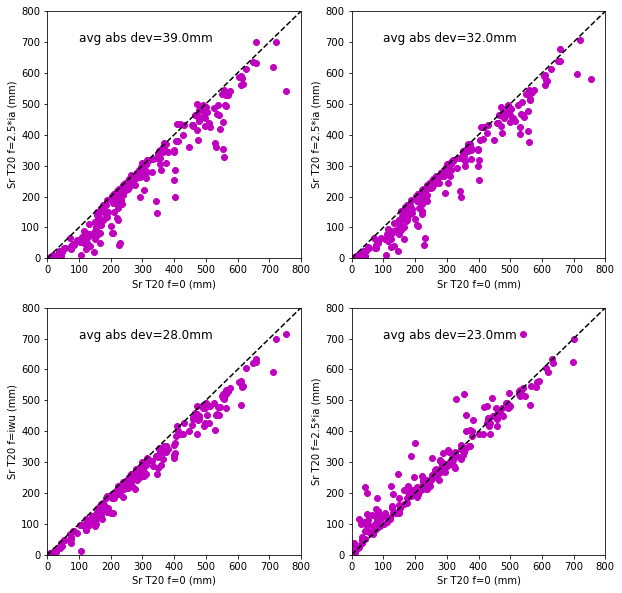

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.plot(sr_df.sr_20_f0, sr_df.sr_20_f25ia, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0 (mm)')
ax.set_ylabel('Sr T20 f=2.5*ia (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_f25ia).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)

ax = fig.add_subplot(222)
ax.plot(sr_df.sr_20_f0, sr_df.sr_20_f20ia, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0 (mm)')
ax.set_ylabel('Sr T20 f=2.5*ia (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_f20ia).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)

ax = fig.add_subplot(223)
ax.plot(sr_df.sr_20_f0, sr_df.sr_20_fiwu, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0 (mm)')
ax.set_ylabel('Sr T20 f=iwu (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_fiwu).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)

ax = fig.add_subplot(224)
ax.plot(sr_df.sr_20_f25ia, sr_df.sr_20_fiwu, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0 (mm)')
ax.set_ylabel('Sr T20 f=2.5*ia (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_fiwu-sr_df.sr_20_f25ia).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)


### compare Sd for different f values

In [16]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
ir = ir[ir>0.05]
ar = df.area

In [234]:
# check which catchments are missing
catch_list = np.genfromtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype='str')[:]
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sd/*0.18.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-10] # remove .year extension
    el_id_list.append(f)
dif = list(set(catch_list) - set(el_id_list))
len(dif)

18

In [235]:
md_05 = []
md_025 = []
md_075 = []
md_015 = []
md_0 = []
md_02 = []
md_018 = []
md_017 = []
md_iwu = []

md_02_rel = []
md_05_rel = []
md_025_rel = []
md_075_rel = []
md_015_rel = []
md_0_rel = []
md_018_rel = []
md_017_rel = []
md_iwu_rel = []

iwu=[]

ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

for catch_id in el_id_list:
    f=0.5
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_05.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_05_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_05_rel.append(np.nan)
    
    f=0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_0.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_0_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_0_rel.append(np.nan)
    
    f=0.25
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_025.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_025_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_025_rel.append(np.nan)
        
    f=0.2
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_02.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_02_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_02_rel.append(np.nan)
    
    f=0.15
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_015.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_015_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_015_rel.append(np.nan)
    
    f=0.18
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_018.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_018_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_018_rel.append(np.nan)
        
    f=0.17
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_017.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_017_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_017_rel.append(np.nan)
        
    f='iwu'
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_iwu.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_iwu_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_iwu_rel.append(np.nan)
        
    iwu.append(d.iwu_mean.mean())

In [268]:
df = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f0.15','f0.17','f0.18','f0.2','f0.25','f0.5','fiwu'])
df['f0'] = md_0
df['f0.15'] = md_015
df['f0.17'] = md_017
df['f0.18'] = md_018
df['f0.2'] = md_02
df['f0.25'] = md_025
df['f0.5'] = md_05
df['fiwu'] = md_iwu
df['iwu'] = iwu
df = df.dropna()

dfr = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f0.15','f0.17','f0.18','f0.2','f0.25','f0.5','fiwu'])
dfr['f0'] = md_0_rel
dfr['f0.15'] = md_015_rel
dfr['f0.17'] = md_017_rel
dfr['f0.18'] = md_018_rel
dfr['f0.2'] = md_02_rel
dfr['f0.25'] = md_025_rel
dfr['f0.5'] = md_05_rel
dfr['fiwu'] = md_iwu_rel
dfr['iwu'] = iwu
dfr = dfr.dropna()

In [269]:
df['irri_areaf'] = ir
dfr['irri_areaf'] = ir
df['irri_area'] = ir*ar
dfr['irri_area'] = ir*ar

In [238]:
# df = df[df['irri_areaf']>0.10]
# dfr = dfr[dfr['irri_areaf']>0.10]

,median,mean,std,q75-q25
f0,-42.41,-47.54,27.26,33.12
f0.15,-6.96,4.47,64.15,49.38
f0.17,-0.38,12.59,72.38,56.59
f0.18,1.27,16.75,76.69,59.81
f0.2,6.76,25.32,85.49,66.20
f0.25,26.01,48.20,109.12,82.49
f0.5,150.12,198.79,259.96,212.56
fiwu,-2.91,-11.16,18.44,13.67


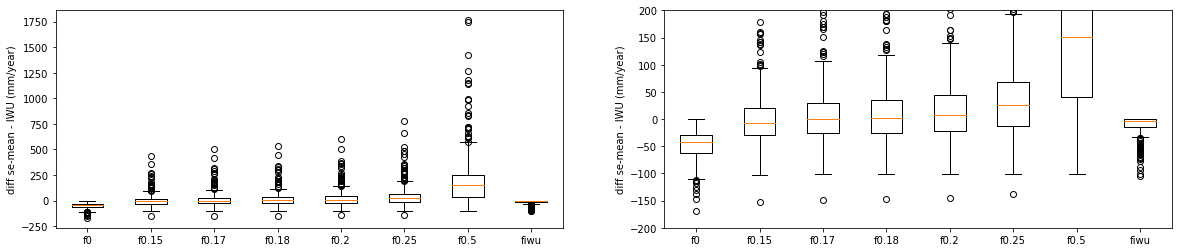

In [239]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(df.iloc[:,1:-2])
ax.set_xticklabels(df.iloc[:,1:-2].columns)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

ax = fig.add_subplot(122)
ax.boxplot(df.iloc[:,1:-2])
ax.set_xticklabels(df.iloc[:,1:-2].columns)
ax.set_ylim(-200,200)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

d = pd.DataFrame(index=df.iloc[:,1:-2].columns, columns=['median','mean','std','q75-q25'])
d['median']=np.round(df.iloc[:,1:-2].median(),2)
d['mean']=np.round(df.iloc[:,1:-2].mean(),2)
d['std']=np.round(df.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((df.iloc[:,1:-2].quantile(0.75) - df.iloc[:,1:-2].quantile(0.25)),2)
d

,median,mean,std,q75-q25
f0,-100.00,-100.00,0.00,0.00
f0.15,-17.01,220.31,2930.62,140.66
f0.17,-4.22,270.07,3384.93,162.29
f0.18,3.11,295.48,3617.72,172.88
f0.2,16.54,348.03,4098.24,196.04
f0.25,55.61,484.53,5323.05,256.97
f0.5,317.73,1321.73,12268.33,631.33
fiwu,-7.14,-23.74,31.61,35.27


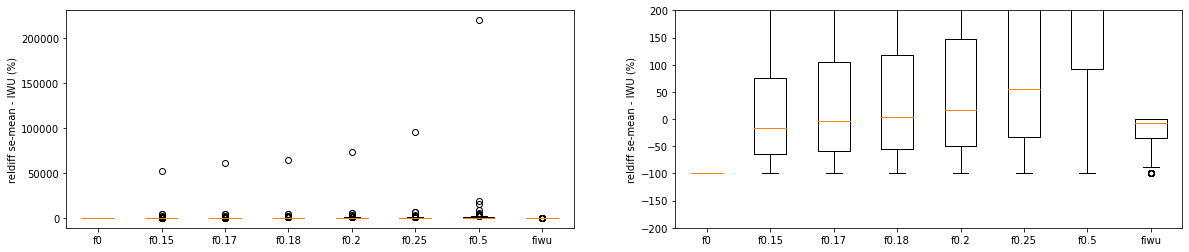

In [240]:
# boxplots of relative errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(dfr.iloc[:,1:-2])
ax.set_xticklabels(dfr.iloc[:,1:-2].columns)
ax.set_ylabel('reldiff se-mean - IWU (%)')

ax = fig.add_subplot(122)
ax.boxplot(dfr.iloc[:,1:-2])
ax.set_xticklabels(dfr.iloc[:,1:-2].columns)
ax.set_ylim(-200,200)
ax.set_ylabel('reldiff se-mean - IWU (%)')

d = pd.DataFrame(index=dfr.iloc[:,1:-2].columns, columns=['median','mean','std','q75-q25'])
d['median']=np.round(dfr.iloc[:,1:-2].median(),2)
d['mean']=np.round(dfr.iloc[:,1:-2].mean(),2)
d['std']=np.round(dfr.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((dfr.iloc[:,1:-2].quantile(0.75) - dfr.iloc[:,1:-2].quantile(0.25)),2)
d

Text(0.5, 1.0, 'r:-0.11, p-value:0.04, std_error:0.0')

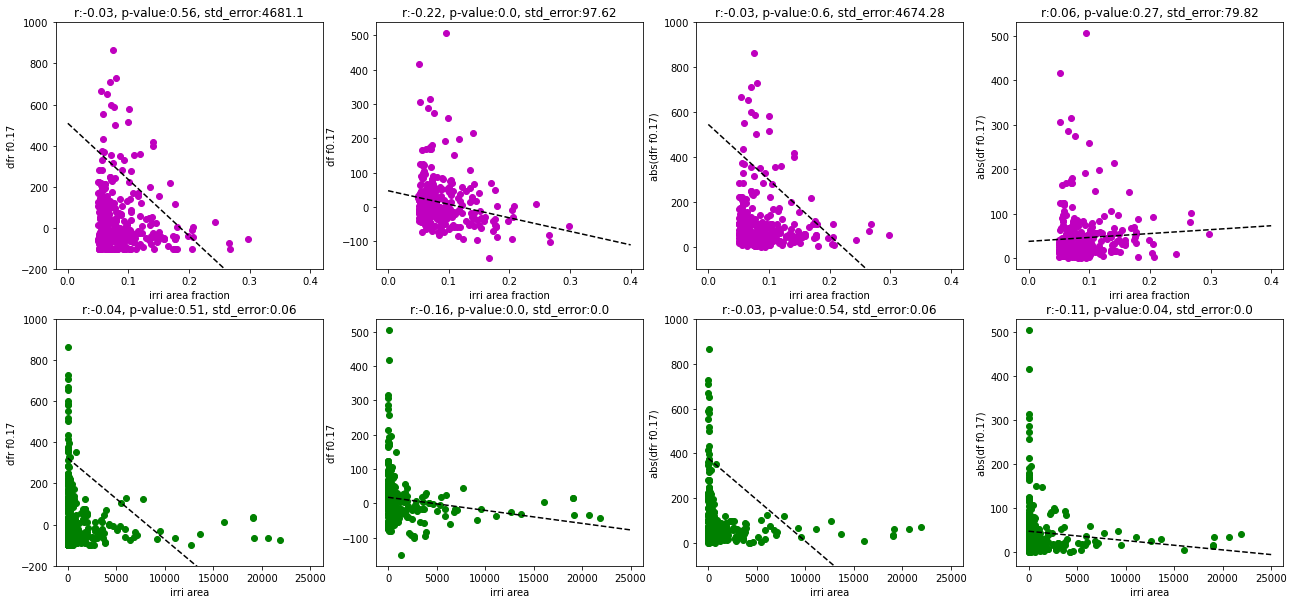

In [262]:
# ERRORS VS IRRI AREA FRACTION f0.17
# ERRORS
x = dfr['irri_areaf']
y = dfr['f0.17']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,0.4,100)
yf = intercept + slope*xf
fig = plt.figure(figsize=(22,10))
ax = fig.add_subplot(241)
ax.plot(dfr['irri_areaf'],dfr['f0.17'], 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('dfr f0.17')
ax.set_xlabel('irri area fraction')
ax.set_ylim(-200,1000)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

x = df['irri_areaf']
y = df['f0.17']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,0.4,100)
yf = intercept + slope*xf
ax = fig.add_subplot(242)
ax.plot(df['irri_areaf'],df['f0.17'], 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('df f0.17')
ax.set_xlabel('irri area fraction')
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

# ABS ERRORS
x = dfr['irri_areaf']
y = abs(dfr['f0.17'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,0.4,100)
yf = intercept + slope*xf
ax = fig.add_subplot(243)
ax.plot(dfr['irri_areaf'],abs(dfr['f0.17']), 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(dfr f0.17)')
ax.set_xlabel('irri area fraction')
ax.set_ylim(-100,1000)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

x = df['irri_areaf']
y = abs(df['f0.17'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,0.4,100)
yf = intercept + slope*xf
ax = fig.add_subplot(244)
ax.plot(df['irri_areaf'],abs(df['f0.17']), 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(df f0.17)')
ax.set_xlabel('irri area fraction')
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')


# ERRORS VS IRRI AREA
# ERRORS
x = dfr['irri_area']
y = dfr['f0.17']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,25000,100)
yf = intercept + slope*xf
ax = fig.add_subplot(245)
ax.plot(dfr['irri_area'],dfr['f0.17'], 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('dfr f0.17')
ax.set_xlabel('irri area')
ax.set_ylim(-200,1000)
# ax.set_xlim(0,0.3)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

x = df['irri_area']
y = df['f0.17']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,25000,100)
yf = intercept + slope*xf
ax = fig.add_subplot(246)
ax.plot(df['irri_area'],df['f0.17'], 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('df f0.17')
ax.set_xlabel('irri area')
# ax.set_ylim(-200,200)
# ax.set_xlim(0,0.3)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

# ABS ERRORS
x = dfr['irri_area']
y = abs(dfr['f0.17'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,25000,100)
yf = intercept + slope*xf
ax = fig.add_subplot(247)
ax.plot(dfr['irri_area'],abs(dfr['f0.17']), 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(dfr f0.17)')
ax.set_xlabel('irri area')
ax.set_ylim(-100,1000)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

x = df['irri_area']
y = abs(df['f0.17'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,25000,100)
yf = intercept + slope*xf
ax = fig.add_subplot(248)
ax.plot(df['irri_area'],abs(df['f0.17']), 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(df f0.17)')
ax.set_xlabel('irri area')
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')



Text(0.5, 1.0, 'r:0.05, p-value:0.38, std_error:0.0')

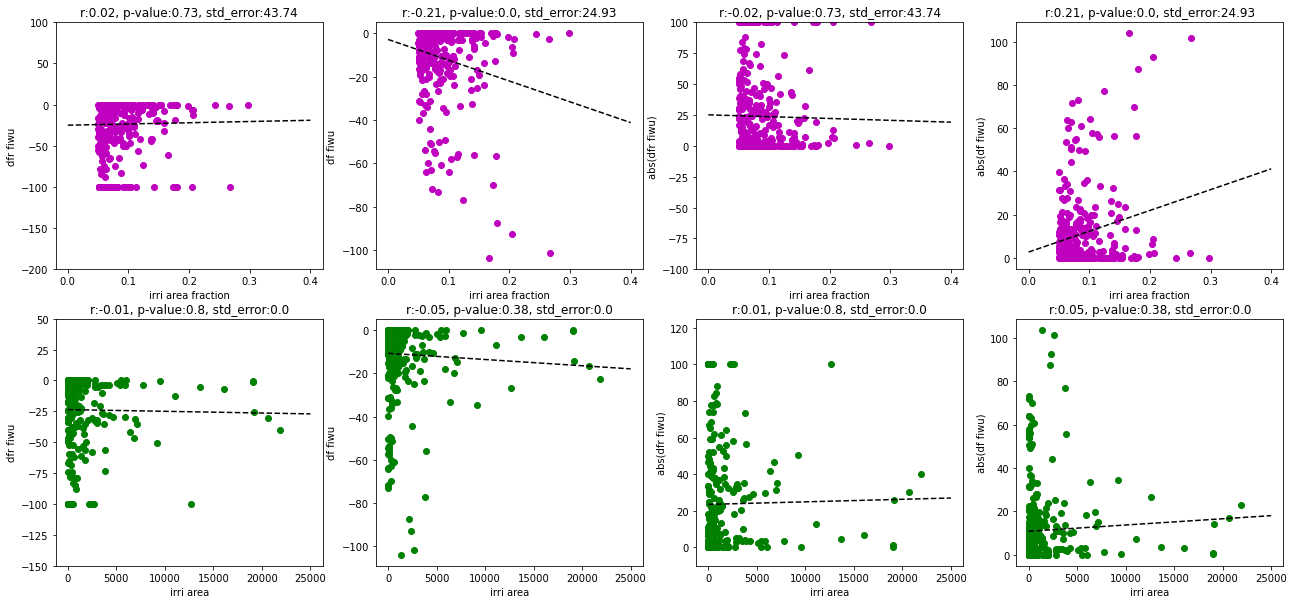

In [266]:
# ERRORS VS IRRI AREA FRACTION fiwu 
# ERRORS
x = dfr['irri_areaf']
y = dfr['fiwu']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,0.4,100)
yf = intercept + slope*xf
fig = plt.figure(figsize=(22,10))
ax = fig.add_subplot(241)
ax.plot(dfr['irri_areaf'],dfr['fiwu'], 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('dfr fiwu')
ax.set_xlabel('irri area fraction')
ax.set_ylim(-200,100)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

x = df['irri_areaf']
y = df['fiwu']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,0.4,100)
yf = intercept + slope*xf
ax = fig.add_subplot(242)
ax.plot(df['irri_areaf'],df['fiwu'], 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('df fiwu')
ax.set_xlabel('irri area fraction')
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

# ABS ERRORS
x = dfr['irri_areaf']
y = abs(dfr['fiwu'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,0.4,100)
yf = intercept + slope*xf
ax = fig.add_subplot(243)
ax.plot(dfr['irri_areaf'],abs(dfr['fiwu']), 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(dfr fiwu)')
ax.set_xlabel('irri area fraction')
ax.set_ylim(-100,100)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

x = df['irri_areaf']
y = abs(df['fiwu'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,0.4,100)
yf = intercept + slope*xf
ax = fig.add_subplot(244)
ax.plot(df['irri_areaf'],abs(df['fiwu']), 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(df fiwu)')
ax.set_xlabel('irri area fraction')
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')


# ERRORS VS IRRI AREA
# ERRORS
x = dfr['irri_area']
y = dfr['fiwu']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,25000,100)
yf = intercept + slope*xf
ax = fig.add_subplot(245)
ax.plot(dfr['irri_area'],dfr['fiwu'], 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('dfr fiwu')
ax.set_xlabel('irri area')
ax.set_ylim(-150,50)
# ax.set_xlim(0,0.3)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

x = df['irri_area']
y = df['fiwu']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,25000,100)
yf = intercept + slope*xf
ax = fig.add_subplot(246)
ax.plot(df['irri_area'],df['fiwu'], 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('df fiwu')
ax.set_xlabel('irri area')
# ax.set_ylim(-200,200)
# ax.set_xlim(0,0.3)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

# ABS ERRORS
x = dfr['irri_area']
y = abs(dfr['fiwu'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,25000,100)
yf = intercept + slope*xf
ax = fig.add_subplot(247)
ax.plot(dfr['irri_area'],abs(dfr['fiwu']), 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(dfr fiwu)')
ax.set_xlabel('irri area')
ax.set_ylim(-10,125)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

x = df['irri_area']
y = abs(df['fiwu'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,25000,100)
yf = intercept + slope*xf
ax = fig.add_subplot(248)
ax.plot(df['irri_area'],abs(df['fiwu']), 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(df fiwu)')
ax.set_xlabel('irri area')
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')


Text(0.5, 1.0, 'r:0.31, p-value:0.0, std_error:0.04')

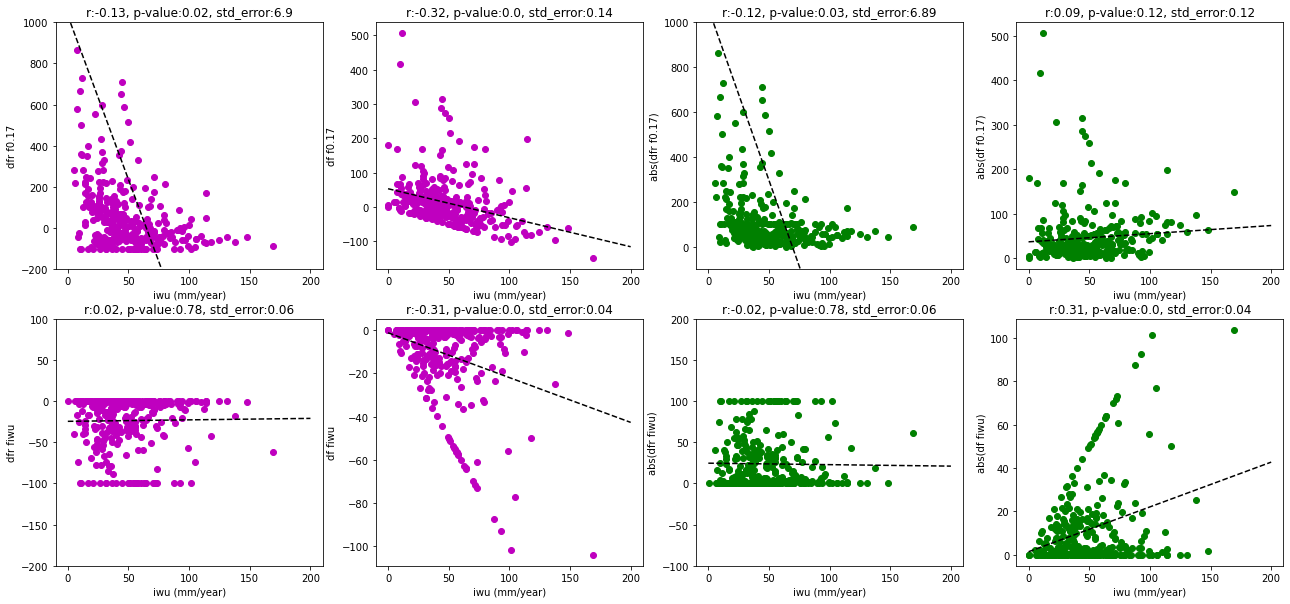

In [277]:
# ERRORS VS IWU f0.17
x = dfr['iwu']
y = dfr['f0.17']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,200,100)
yf = intercept + slope*xf
fig = plt.figure(figsize=(22,10))
ax = fig.add_subplot(241)
ax.plot(dfr['iwu'],dfr['f0.17'], 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('dfr f0.17')
ax.set_xlabel('iwu (mm/year)')
ax.set_ylim(-200,1000)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')


x = df['iwu']
y = df['f0.17']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,200,100)
yf = intercept + slope*xf
ax = fig.add_subplot(242)
ax.plot(df['iwu'],df['f0.17'], 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('df f0.17')
ax.set_xlabel('iwu (mm/year)')
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

# ABS ERRORS
x = dfr['iwu']
y = abs(dfr['f0.17'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,200,100)
yf = intercept + slope*xf
ax = fig.add_subplot(243)
ax.plot(dfr['iwu'],abs(dfr['f0.17']), 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(dfr f0.17)')
ax.set_xlabel('iwu (mm/year)')
ax.set_ylim(-100,1000)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

x = df['iwu']
y = abs(df['f0.17'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,200,100)
yf = intercept + slope*xf
ax = fig.add_subplot(244)
ax.plot(df['iwu'],abs(df['f0.17']), 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(df f0.17)')
ax.set_xlabel('iwu (mm/year)')
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

# fiwu
x = dfr['iwu']
y = dfr['fiwu']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,200,100)
yf = intercept + slope*xf
ax = fig.add_subplot(245)
ax.plot(dfr['iwu'],dfr['fiwu'], 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('dfr fiwu')
ax.set_xlabel('iwu (mm/year)')
ax.set_ylim(-200,100)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')


x = df['iwu']
y = df['fiwu']
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,200,100)
yf = intercept + slope*xf
ax = fig.add_subplot(246)
ax.plot(df['iwu'],df['fiwu'], 'mo')
ax.plot(xf,yf,'k--')
ax.set_ylabel('df fiwu')
ax.set_xlabel('iwu (mm/year)')
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

# ABS ERRORS
x = dfr['iwu']
y = abs(dfr['fiwu'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,200,100)
yf = intercept + slope*xf
ax = fig.add_subplot(247)
ax.plot(dfr['iwu'],abs(dfr['fiwu']), 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(dfr fiwu)')
ax.set_xlabel('iwu (mm/year)')
ax.set_ylim(-100,200)
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')

x = df['iwu']
y = abs(df['fiwu'])
y = y.dropna()
x = x[y.index]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
xf = np.linspace(0,200,100)
yf = intercept + slope*xf
ax = fig.add_subplot(248)
ax.plot(df['iwu'],abs(df['fiwu']), 'go')
ax.plot(xf,yf,'k--')
ax.set_ylabel('abs(df fiwu)')
ax.set_xlabel('iwu (mm/year)')
ax.set_title(f'r:{np.round(r_value,2)}, p-value:{np.round(p_value,2)}, std_error:{np.round(std_err,2)}')


In [87]:
#shapes
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

df['lon'] = sh.centroid.x
df['lat'] = sh.centroid.y

dfr['lon'] = sh.centroid.x
dfr['lat'] = sh.centroid.y

Text(0.5, 1.0, 'abs diff Se - IWU for f0.2')

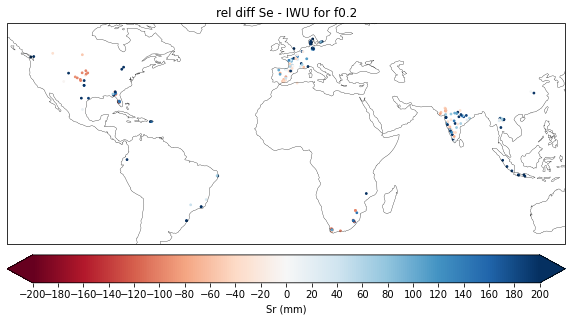

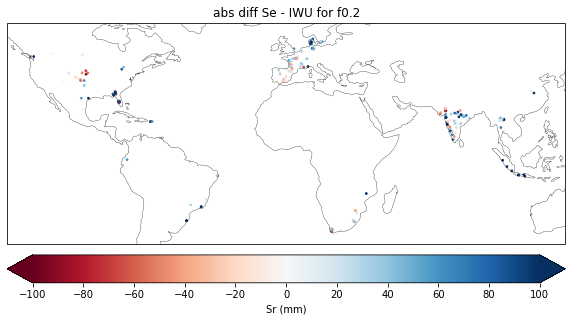

In [115]:
lvls = np.arange(-200,220,20) # scale W-E paper
cm = plt.cm.get_cmap('RdBu')

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(dfr.lon,dfr.lat,c=dfr['f0.2'],s=3,cmap=cm,vmin=-200,vmax=200)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr (mm)',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'rel diff Se - IWU for f0.2',size=12)

lvls = np.arange(-100,120,20) # scale W-E paper
cm = plt.cm.get_cmap('RdBu')

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(dfr.lon,dfr.lat,c=df['f0.2'],s=3,cmap=cm,vmin=-100,vmax=100)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr (mm)',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'abs diff Se - IWU for f0.2',size=12)

Text(0.5, 1.0, 'abs diff Se - IWU for f0.5')

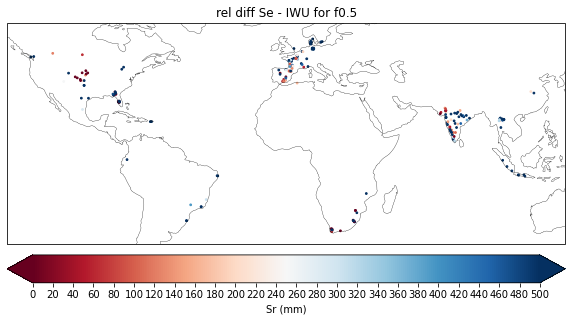

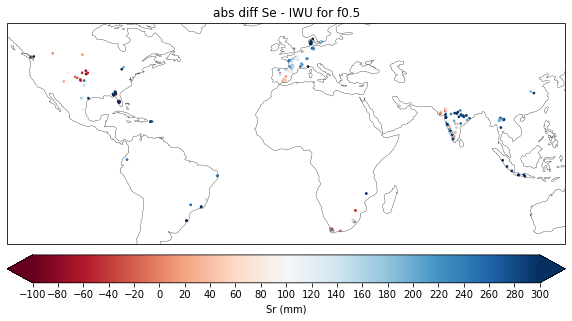

In [127]:
lvls = np.arange(0,800,20) # scale W-E paper
cm = plt.cm.get_cmap('RdBu')

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(dfr.lon,dfr.lat,c=dfr['f0.5'],s=3,cmap=cm,vmin=0,vmax=500)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr (mm)',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'rel diff Se - IWU for f0.5',size=12)

lvls = np.arange(-100,320,20) # scale W-E paper
cm = plt.cm.get_cmap('RdBu')

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(dfr.lon,dfr.lat,c=df['f0.5'],s=3,cmap=cm,vmin=-100,vmax=300)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr (mm)',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'abs diff Se - IWU for f0.5',size=12)

## SR CALCULATION FOR IRRI CATCHMENTS

In [201]:
catch_list = np.genfromtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype='str')[:]
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sd/*0.25.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-10] # remove .year extension
    el_id_list.append(f)
dif = list(set(catch_list) - set(el_id_list))
len(dif)

18

In [202]:
# define directories
sd_dir = f'{work_dir}/output/sr_calculation/sd_catchments'
out_dir = f'{work_dir}/output/sr_calculation/sr_catchments'

# define return periods
rp_array = [2,3,5,10,20,30,40,50,60,70,80]
# f_array = [0,0.15,0.20,0.25,0.5] #parallelization of this does not work properly so run one by one f value - does not take much time
f_array = ['iwu']
# c = np.loadtxt(f'{work_dir}/output/sr_calculation/sd_list.txt',dtype=str) 
catch_id_list = el_id_list
sd_dir_list = [sd_dir] * len(catch_id_list)
out_dir_list = [out_dir] * len(catch_id_list) 
rp_array_list = [rp_array] * len(catch_id_list) 
f_list = f_array * len(catch_id_list)
irri_id_list = catch_id_list

run_sr_calculation_parallel(catch_id_list,rp_array_list,sd_dir_list,out_dir_list,f_list,irri_id_list) #run all catchments parallel on delftblue

In [205]:
ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

sr_df = pd.DataFrame(index=el_id_list, columns=['sr_20_f0','sr_20_f015','sr_20_f017','sr_20_f018','sr_20_f02','sr_20_f025','sr_20_f05','sr_20_fiwu'])
f_list=['0','0.15','0.17','0.18','0.2','0.25','0.5','iwu']
for catch_id in el_id_list:
    for f in f_list:
        if os.path.exists(f'{ifol}/sr/{catch_id}_f{f}.csv'):
            d = pd.read_csv(f'{ifol}/sr/{catch_id}_f{f}.csv',index_col=0)
            if (f=='0'):
                sr_df.loc[catch_id,f'sr_20_f0'] = d.loc[catch_id,'20']
            if (f=='0.15'):
                sr_df.loc[catch_id,f'sr_20_f015'] = d.loc[catch_id,'20']
            if (f=='0.17'):
                sr_df.loc[catch_id,f'sr_20_f017'] = d.loc[catch_id,'20']
            if (f=='0.18'):
                sr_df.loc[catch_id,f'sr_20_f018'] = d.loc[catch_id,'20']
            if (f=='0.2'):
                sr_df.loc[catch_id,f'sr_20_f02'] = d.loc[catch_id,'20']
            if (f=='0.25'):
                sr_df.loc[catch_id,f'sr_20_f025'] = d.loc[catch_id,'20']
            if (f=='0.5'):
                sr_df.loc[catch_id,f'sr_20_f05'] = d.loc[catch_id,'20']
            if (f=='iwu'):
                sr_df.loc[catch_id,f'sr_20_fiwu'] = d.loc[catch_id,'20']

sr_df['abs_0-05'] = sr_df.sr_20_f0 - sr_df.sr_20_f05
sr_df['abs_0-02'] = sr_df.sr_20_f0 - sr_df.sr_20_f02
sr_df['rel_0-05'] = (sr_df.sr_20_f0 - sr_df.sr_20_f05)/sr_df.sr_20_f0
sr_df['rel_0-02'] = (sr_df.sr_20_f0 - sr_df.sr_20_f02)/sr_df.sr_20_f0

In [206]:
sr_df

,sr_20_f0,sr_20_f015,sr_20_f017,sr_20_f018,sr_20_f02,sr_20_f025,sr_20_f05,sr_20_fiwu,abs_0-05,abs_0-02,rel_0-05,rel_0-02
za_0000068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
us_0005540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_0000151,357.235277,320.775313,316.695243,314.798781,310.473156,298.78486,224.083942,290.981704,133.151335,46.76212,0.372727,0.1309
dk_0000016,75.505222,35.576372,34.15192,33.514291,32.356362,30.566259,29.300798,58.710657,46.204424,43.14886,0.611937,0.571469
de_0000251,164.65606,144.703967,142.053926,140.543682,137.677278,130.215445,86.273397,142.743535,78.382663,26.978782,0.476039,0.163849
...,...,...,...,...,...,...,...,...,...,...,...,...
fr_0000663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_0000031,498.154782,442.776332,435.864,432.712473,423.313278,398.743064,187.720017,426.624458,310.434765,74.841504,0.623169,0.150237
in_0000123,351.882233,345.306756,344.867186,344.319421,343.724229,341.972386,335.55111,342.365433,16.331123,8.158004,0.046411,0.023184
us_0001651,35.835859,23.880663,23.264486,22.978247,22.427231,21.720835,19.739006,24.421895,16.096854,13.408628,0.449183,0.374168


In [216]:
(sr_df.sr_20_f0-sr_df.sr_20_f05).mean()

84.79203520934067

(0.0, 800.0)

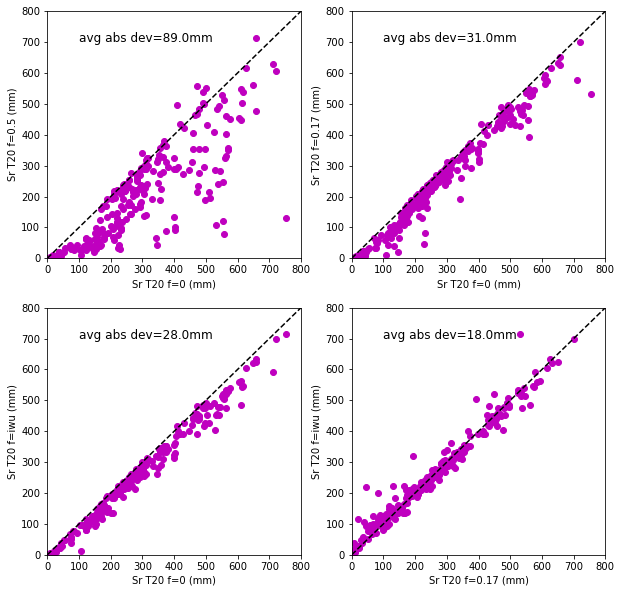

In [244]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.plot(sr_df.sr_20_f0, sr_df.sr_20_f05, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0 (mm)')
ax.set_ylabel('Sr T20 f=0.5 (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_f05).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)

ax = fig.add_subplot(222)
ax.plot(sr_df.sr_20_f0, sr_df.sr_20_f017, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0 (mm)')
ax.set_ylabel('Sr T20 f=0.17 (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_f017).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)

ax = fig.add_subplot(223)
ax.plot(sr_df.sr_20_f0, sr_df.sr_20_fiwu, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0 (mm)')
ax.set_ylabel('Sr T20 f=iwu (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_fiwu).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)

ax = fig.add_subplot(224)
ax.plot(sr_df.sr_20_f017, sr_df.sr_20_fiwu, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0.17 (mm)')
ax.set_ylabel('Sr T20 f=iwu (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f017-sr_df.sr_20_fiwu).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)


Text(0, 0.5, 'f-mean with fiwu')

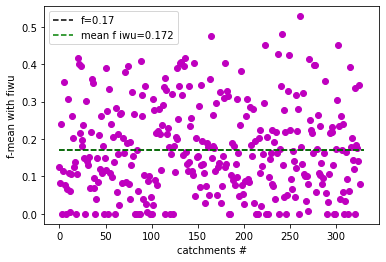

In [260]:
# plot f values for fiwu vs f0.17
f = 'iwu'
fm = []
for catch_id in el_id_list:
    if os.path.exists(f'{ifol}/se/{catch_id}_f{f}.csv'):
        d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
        fmean = d['f'].mean()
        fm.append(fmean)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(fm, 'mo')
ax.plot([0,330],[0.17,0.17],'k--', label=f'f=0.17')
ax.plot([0,330],[np.mean(fm),np.mean(fm)],'g--', label=f'mean f iwu={np.round(np.mean(fm),3)}')
ax.legend()
ax.set_xlabel('catchments #')
ax.set_ylabel('f-mean with fiwu')
# ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_f05).mean(),0)}mm',[100,700],size=12)
# ax.set_xlim(0,800)
# ax.set_ylim(0,800)


In [52]:
# MAP Sr values in irri areas
#shapes
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

sr_df['lon'] = sh.centroid.x
sr_df['lat'] = sh.centroid.y

Text(0.5, 1.0, 'Sr T=20 firri=0.5')

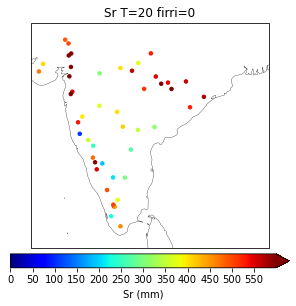

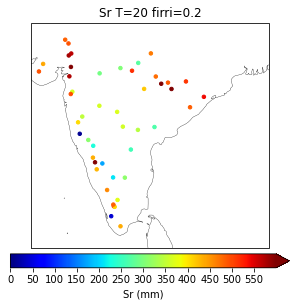

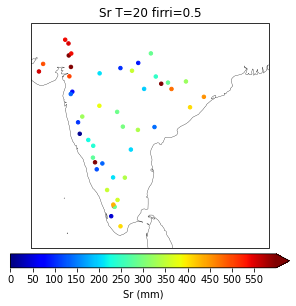

In [85]:
lvls = np.arange(0,600,50) # scale W-E paper
cm = plt.cm.get_cmap('jet')

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df.sr_20_f0,s=12,cmap=cm,vmin=0,vmax=600)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr (mm)',extend='max', pad=0.02, ticks = lvls)
ax.set_title(f'Sr T=20 firri=0',size=12)

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df.sr_20_f02,s=12,cmap=cm,vmin=0,vmax=600)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr (mm)',extend='max', pad=0.02, ticks = lvls)
ax.set_title(f'Sr T=20 firri=0.2',size=12)

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df.sr_20_f05,s=12,cmap=cm,vmin=0,vmax=600)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr (mm)',extend='max', pad=0.02, ticks = lvls)
ax.set_title(f'Sr T=20 firri=0.5',size=12)

Text(0.5, 1.0, 'Sr T=20 firri=0.5')

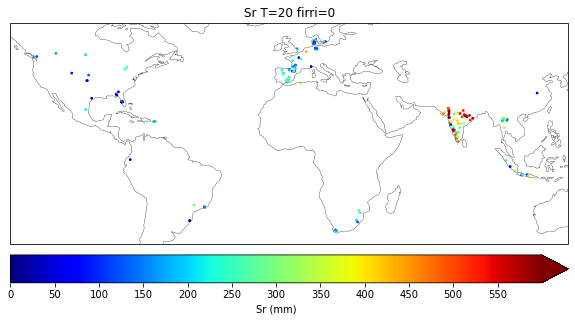

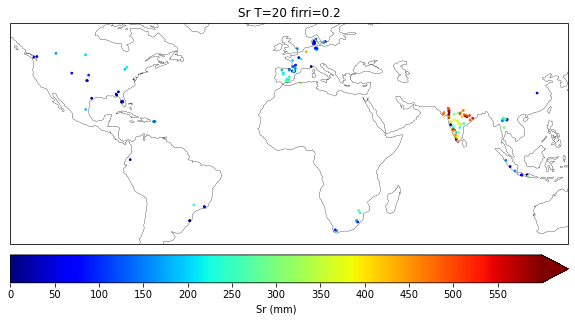

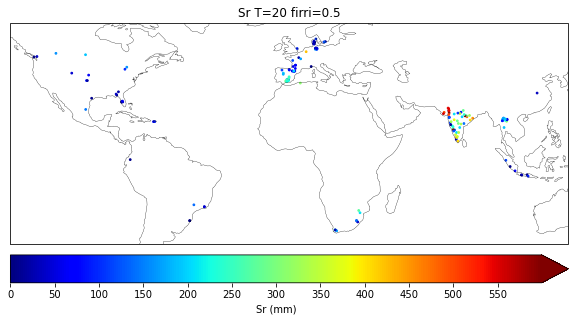

In [118]:
lvls = np.arange(0,600,50) # scale W-E paper
cm = plt.cm.get_cmap('jet')

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df.sr_20_f0,s=3,cmap=cm,vmin=0,vmax=600)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr (mm)',extend='max', pad=0.02, ticks = lvls)
ax.set_title(f'Sr T=20 firri=0',size=12)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df.sr_20_f02,s=3,cmap=cm,vmin=0,vmax=600)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr (mm)',extend='max', pad=0.02, ticks = lvls)
ax.set_title(f'Sr T=20 firri=0.2',size=12)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df.sr_20_f05,s=3,cmap=cm,vmin=0,vmax=600)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr (mm)',extend='max', pad=0.02, ticks = lvls)
ax.set_title(f'Sr T=20 firri=0.5',size=12)



Text(0.5, 1.0, 'Sr reldiff T=20 [firri=0]-[firri=0.2]')

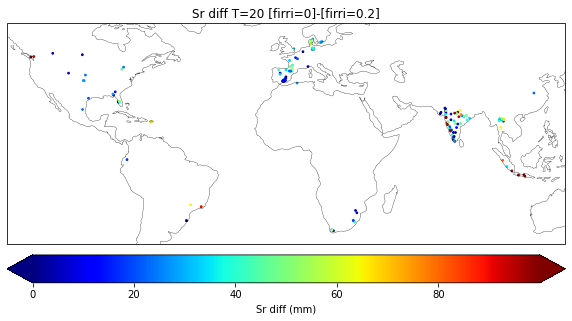

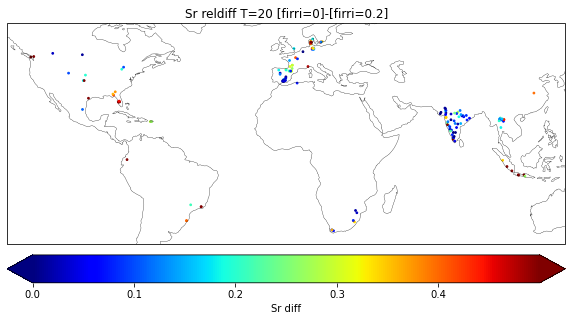

In [122]:
cm = plt.cm.get_cmap('jet')

lvls = np.arange(0,100,20)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['abs_0-02'],s=3,cmap=cm,vmin=0,vmax=100)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff (mm)',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'Sr diff T=20 [firri=0]-[firri=0.2]',size=12)

lvls = np.arange(0,0.5,0.1)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['rel_0-02'],s=3,cmap=cm,vmin=0,vmax=0.5)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'Sr reldiff T=20 [firri=0]-[firri=0.2]',size=12)

Text(0.5, 1.0, 'Sr reldiff T=20 [firri=0]-[firri=0.5]')

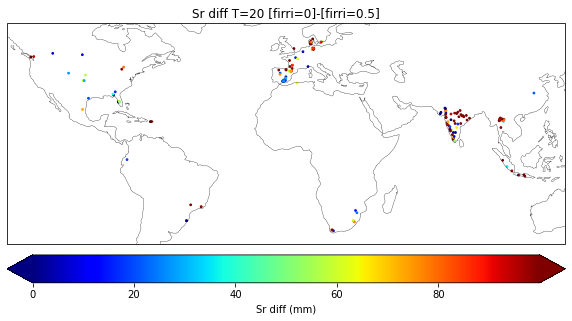

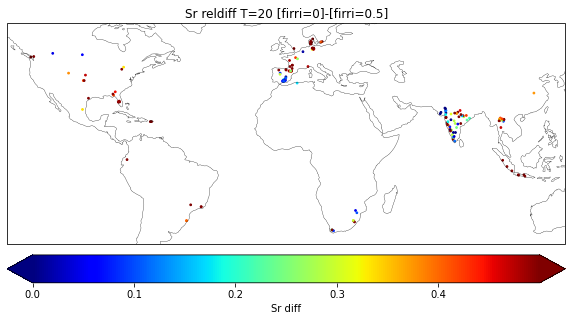

In [123]:
cm = plt.cm.get_cmap('jet')

lvls = np.arange(0,100,20)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['abs_0-05'],s=3,cmap=cm,vmin=0,vmax=100)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff (mm)',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'Sr diff T=20 [firri=0]-[firri=0.5]',size=12)

lvls = np.arange(0,0.5,0.1)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-135,130)
ax.set_ylim(-40,65)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['rel_0-05'],s=3,cmap=cm,vmin=0,vmax=0.5)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'Sr reldiff T=20 [firri=0]-[firri=0.5]',size=12)

Text(0.5, 1.0, 'Sr reldiff T=20 [firri=0]-[firri=0.2]')

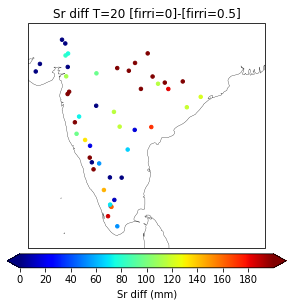

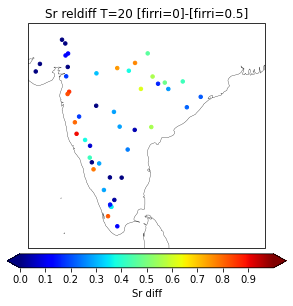

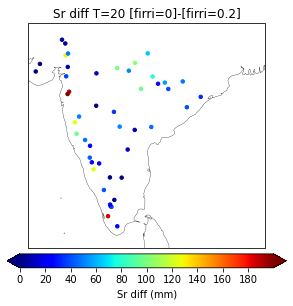

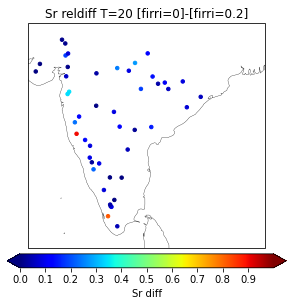

In [86]:
cm = plt.cm.get_cmap('jet')

lvls = np.arange(0,200,20)
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['abs_0-05'],s=12,cmap=cm,vmin=0,vmax=200)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff (mm)',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'Sr diff T=20 [firri=0]-[firri=0.5]',size=12)

lvls = np.arange(0,1,0.1)
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['rel_0-05'],s=12,cmap=cm,vmin=0,vmax=1)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'Sr reldiff T=20 [firri=0]-[firri=0.5]',size=12)

cm = plt.cm.get_cmap('jet')

lvls = np.arange(0,200,20)
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['abs_0-02'],s=12,cmap=cm,vmin=0,vmax=200)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff (mm)',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'Sr diff T=20 [firri=0]-[firri=0.2]',size=12)

lvls = np.arange(0,1,0.1)
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['rel_0-02'],s=12,cmap=cm,vmin=0,vmax=1)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'Sr reldiff T=20 [firri=0]-[firri=0.2]',size=12)

Text(0.5, 1.0, 'Sr reldiff T=20 [firri=0]-[firri=0.2]')

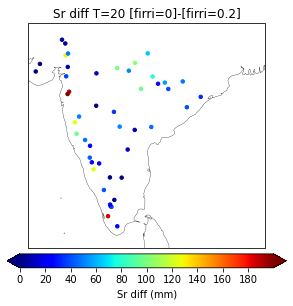

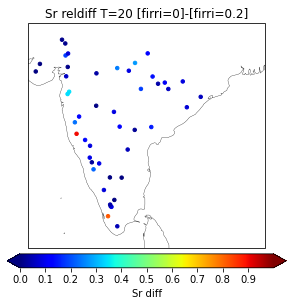

In [65]:
cm = plt.cm.get_cmap('jet')

lvls = np.arange(0,200,20)
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['abs_0-02'],s=12,cmap=cm,vmin=0,vmax=200)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff (mm)',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'Sr diff T=20 [firri=0]-[firri=0.2]',size=12)

lvls = np.arange(0,1,0.1)
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['rel_0-02'],s=12,cmap=cm,vmin=0,vmax=1)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff',extend='both', pad=0.02, ticks = lvls)
ax.set_title(f'Sr reldiff T=20 [firri=0]-[firri=0.2]',size=12)

In [ ]:
# INDIA
bounds3 = np.linspace(50,100,6)
fig = plt.figure(figsize=(3,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# EUROPE
# bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-15,25)
ax.set_ylim(30,75)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# USA
# bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-130,-70)
ax.set_ylim(20,55)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=3,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


In [27]:
print('# irri catchments: ',len(sr_df.index))
print('# sr catchments not nan f0: ',len(sr_df.sr_20_f0.dropna()))
print('# sr catchments not nan f0.15: ',len(sr_df.sr_20_f015.dropna()))
print('# sr catchments not nan f0.2: ',len(sr_df.sr_20_f02.dropna()))
print('# sr catchments not nan f0.25: ',len(sr_df.sr_20_f025.dropna()))
print('# sr catchments not nan f0.5: ',len(sr_df.sr_20_f05.dropna()))

# irri catchments:  327
# sr catchments not nan f0:  251
# sr catchments not nan f0.15:  251
# sr catchments not nan f0.2:  251
# sr catchments not nan f0.25:  251
# sr catchments not nan f0.5:  251


In [28]:
c = 'us_0005540'
sd0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sd/{c}_f0.csv', index_col=0)
sd05 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sd/{c}_f0.5.csv', index_col=0)
sd0


,p,ep,date_start,date_end,Si_1,Pe,Si_2,Ei,Si_3,Et,Sd,se,p_irri,sd2,se2
1982-06-01,0.871107,2.495306,1982-06-01,2010-05-31,0.871107,0.000000,0.871107,0.871107,0.000000,NaN,0.0,0.0,0.000000,0.0,NaN
1982-06-02,12.757019,1.147651,1982-06-01,2010-05-31,12.757019,10.257019,2.500000,1.147651,1.352349,NaN,0.0,NaN,10.257019,0.0,NaN
1982-06-03,4.976742,0.848417,1982-06-01,2010-05-31,6.329091,3.829091,2.500000,0.848417,1.651583,NaN,0.0,NaN,3.829091,0.0,NaN
1982-06-04,3.039492,2.767190,1982-06-01,2010-05-31,4.691076,2.191076,2.500000,2.500000,0.000000,NaN,0.0,NaN,2.191076,0.0,NaN
1982-06-05,2.000284,2.419455,1982-06-01,2010-05-31,2.000284,0.000000,2.000284,2.000284,0.000000,NaN,0.0,NaN,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-05-27,7.790463,3.945832,1982-06-01,2010-05-31,7.790463,5.290463,2.500000,2.500000,0.000000,NaN,0.0,NaN,5.290463,0.0,NaN
2010-05-28,3.264072,4.356053,1982-06-01,2010-05-31,3.264072,0.764072,2.500000,2.500000,0.000000,NaN,0.0,NaN,0.764072,0.0,NaN
2010-05-29,3.700626,4.424225,1982-06-01,2010-05-31,3.700626,1.200626,2.500000,2.500000,0.000000,NaN,0.0,NaN,1.200626,0.0,NaN
2010-05-30,0.479836,4.063900,1982-06-01,2010-05-31,0.479836,0.000000,0.479836,0.479836,0.000000,NaN,0.0,NaN,0.000000,0.0,NaN


<AxesSubplot:>

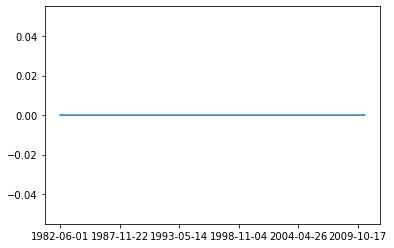

In [29]:
sd0.sd2.plot()

<AxesSubplot:>

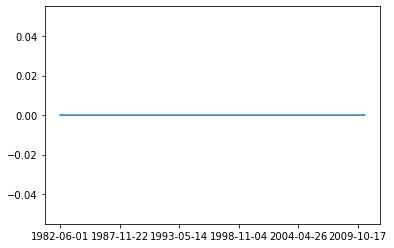

In [30]:
sd05.sd2.plot()

In [31]:
catch_id=c
# if(os.path.exists(f'{sd_dir}/{catch_id}.csv')==True):  
f=0
if catch_id in irri_id_list:
    # read storage deficit table
    sd_table = pd.read_csv(f'{sd_dir}/irri/sd/{catch_id}_f{f}.csv',index_col=0)
    sd_table.index = pd.to_datetime(sd_table.index)

    # get sd, start and end year and date from sd_table
    Sd = sd_table.sd2

else:
    # read storage deficit table
    sd_table = pd.read_csv(f'{sd_dir}/{catch_id}.csv',index_col=0)
    sd_table.index = pd.to_datetime(sd_table.index)

    # get sd, start and end year and date from sd_table
    Sd = sd_table.Sd
year_start = sd_table.index[0].year
year_end = sd_table.index[-1].year
date_start = str(sd_table.index[0].month)+'-'+str(sd_table.index[0].day)
date_end = str(sd_table.index[-1].month)+'-'+str(sd_table.index[-1].day)
if(date_end=='2-29'):
    date_end='2-28'

if ((year_end-year_start)>10) and (sd_table.Et.max()>0):#only if our timeseries is longer than 10years and Et is not nan
    # calculate sr for different return periods using (4)
    sr_T = sr_return_periods_minmax_rzyear(rp_array, Sd, year_start, year_end, date_start, date_end)

    # store dataframe with catchment sr values
    sr_df = pd.DataFrame(index=[catch_id], columns=rp_array)
    sr_df.loc[catch_id]=sr_T

    if catch_id in irri_id_list:     
        sr_df.to_csv(f'{sd_dir}/irri/sr/{catch_id}_f{f}.csv')
    else:
        sr_df.to_csv(f'{out_dir}/{catch_id}.csv')

In [32]:
(os.path.exists(f'{sd_dir}/{catch_id}.csv')==True)

True

In [33]:
sr_df

,sr_20_f0,sr_20_f015,sr_20_f02,sr_20_f025,sr_20_f05
za_0000068,NaN,NaN,NaN,NaN,NaN
us_0005540,NaN,NaN,NaN,NaN,NaN
in_0000151,357.235277,320.775313,310.473156,298.78486,224.083942
dk_0000016,75.505222,35.576372,32.356362,30.566259,29.300798
de_0000251,164.65606,144.703967,137.677278,130.215445,86.273397
...,...,...,...,...,...
fr_0000663,NaN,NaN,NaN,NaN,NaN
in_0000031,498.154782,442.776332,423.313278,398.743064,187.720017
in_0000123,351.882233,345.306756,343.724229,341.972386,335.55111
us_0001651,35.835859,23.880663,22.427231,21.720835,19.739006


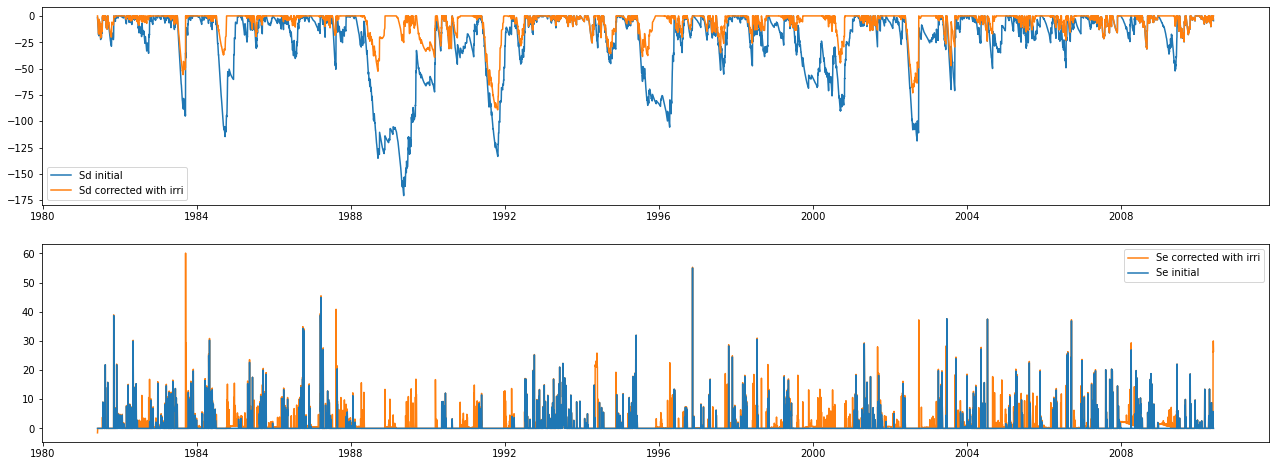

In [54]:
fig = plt.figure(figsize=(22,8))
ax = fig.add_subplot(211)
ax.plot(s2.index,s2.Sd, label='Sd initial')
ax.plot(s2.index,s2.sd2, label='Sd corrected with irri')
ax.legend()

ax = fig.add_subplot(212)
ax.plot(s2.index,s2.se2, color='tab:orange', label='Se corrected with irri')
ax.plot(s2.index,s2.se, color='tab:blue', label='Se initial')
ax.legend()


In [64]:
def sr_return_periods_minmax_rzyear(rp_array,Sd,year_start,year_end,date_start,date_end):
    """
    calculate sr for different return periods - min max root zone year approach from Stijn??
    
    rp_array:   int, array, list of return periods
    sd:         pandas df, storage deficits
    year_start: str, start year
    year_end:   str, end year
    date_start: str, month-day start
    date_end:   str, month-day end
    
    returns:
    Sd_T:       list of storage deficit for return periods in rp_array
    
    """

    # inverse of sd
    Sd = Sd*-1
    
    # count years
    total_years = year_end - year_start
    years = range(year_start,year_end+1,1)

    # calculate annual max Sd - without iterations for hydro years
    # CHECK THIS PROCEDURE AGAIN FRANSJE
    Sd_max=[]
    Sd_maxmin = []
    if (str(date_start)=='1-1'):
        for i in range(0,total_years+1,1):
            sd_max_i = max(Sd.loc[str(years[i])+'-'+str(date_start):str(years[i])+'-'+str(date_end)]) #max value
            Sd_max.append(sd_max_i) #append max deficit per year
            # print(str(years[i])+'-'+str(date_start), str(years[i])+'-'+str(date_end))

            sd_max_ix = Sd.loc[str(years[i])+'-'+str(date_start):str(years[i])+'-'+str(date_end)].idxmax() #find index of max value
            sd_hystart_maxvalue = Sd.loc[str(years[i])+'-'+str(date_start):sd_max_ix] #timeseries from start hydroyear to index of max value
            min_value = min(sd_hystart_maxvalue) #find min value in timeseries before max value
            Sd_maxmin.append(sd_max_i-min_value) #append max-min sd per year
    else:
        for i in range(0,total_years,1):
            sd_max_i = max(Sd.loc[str(years[i])+'-'+str(date_start):str(years[i+1])+'-'+str(date_end)]) #max value
            Sd_max.append(sd_max_i) #append max deficit per year
            # print(str(years[i])+'-'+str(date_start), str(years[i+1])+'-'+str(date_end))

            sd_max_ix = Sd.loc[str(years[i])+'-'+str(date_start):str(years[i+1])+'-'+str(date_end)].idxmax() #find index of max value
            sd_hystart_maxvalue = Sd.loc[str(years[i])+'-'+str(date_start):sd_max_ix] #timeseries from start hydroyear to index of max value
            min_value = min(sd_hystart_maxvalue) #find min value in timeseries before max value
            Sd_maxmin.append(sd_max_i-min_value) #append max-min sd per year

    # define root zone year
    sd_max_month = Sd.groupby(pd.Grouper(freq='M')).max() #calculate maximum sd per month
    sd_max_month_sum =  sd_max_month.groupby([sd_max_month.index.month]).sum() #sum max sd per month for full timeseries per month
    start_rz_year = sd_max_month_sum.idxmin() #define month where rz year starts
    date_start_rz_year = str(start_rz_year)+'-1'        
    if(start_rz_year==1):
        start_rz_year=13
    day_end_rz_year = calendar.monthrange(2010,start_rz_year-1)[1] #find last day of end month rz year
    date_end_rz_year = str(start_rz_year-1)+'-'+str(day_end_rz_year)

    # calculate annual max Sd - without iterations for rootzone years -> CHECK THIS APPROACH
    Sd_max_rz_year = []
    Sd_maxmin_rz_year = []
    if (str(date_start_rz_year)=='1-1'):
        for i in range(0,total_years+1,1):
            sd_max_i = max(Sd.loc[str(years[i])+'-'+str(date_start_rz_year):str(years[i])+'-'+str(date_end_rz_year)])
            Sd_max_rz_year.append(sd_max_i) #append max deficit per year
            # print(str(years[i])+'-'+str(date_start_rz_year), str(years[i])+'-'+str(date_end_rz_year))

            sd_max_ix = Sd.loc[str(years[i])+'-'+str(date_start_rz_year):str(years[i])+'-'+str(date_end_rz_year)].idxmax() #find index of max value
            sd_hystart_maxvalue = Sd.loc[str(years[i])+'-'+str(date_start_rz_year):sd_max_ix] #timeseries from start rzyear to index of max value
            min_value = min(sd_hystart_maxvalue) #find min value in timeseries before max value
            Sd_maxmin_rz_year.append(sd_max_i-min_value) #append max-min sd per year
    else:
        for i in range(0,total_years,1):
            sd_max_i = max(Sd.loc[str(years[i])+'-'+str(date_start_rz_year):str(years[i+1])+'-'+str(date_end_rz_year)])
            Sd_max_rz_year.append(sd_max_i) #append max deficit per year
            # print(str(years[i])+'-'+str(date_start_rz_year), str(years[i+1])+'-'+str(date_end_rz_year))

            sd_max_ix = Sd.loc[str(years[i])+'-'+str(date_start_rz_year):str(years[i+1])+'-'+str(date_end_rz_year)].idxmax() #find index of max value
            sd_hystart_maxvalue = Sd.loc[str(years[i])+'-'+str(date_start_rz_year):sd_max_ix] #timeseries from start rzyear to index of max value
            min_value = min(sd_hystart_maxvalue) #find min value in timeseries before max value
            Sd_maxmin_rz_year.append(sd_max_i-min_value) #append max-min sd per year        
        
    # gumbel function
    def gumbel_r_mom(x):
        """
        gumbel extreme value analysis
        x:        list of max sd values per year
        returns:  loc and scale of gumbel distribution
        
        """
        scale = np.sqrt(6)/np.pi * np.std(x)
        loc = np.mean(x) - np.euler_gamma*scale
        return loc, scale    

    # calculate gumbel parameters
    # loc1, scale1 = gumbel_r_mom(Sd_maxmin_rz_year)
    loc1, scale1 = gumbel_r_mom(Sd_maxmin)

    # find Sd value corresponding with return period
    Sd_T = []
    for i in np.arange(0,len(rp_array),1):
        p = 1-(1/rp_array[i])
        y = -np.log(-np.log(p))
        x = scale1 * y + loc1
        Sd_T.append(x)
         
    return(Sd_T)   


In [87]:
## 6
def run_sr_calculation(catch_id, rp_array, sd_dir, out_dir,f,irri_id_list):
    """
    run sr calculation
    
    catch_id:   str, catchment id
    rp_array:   int, array, array of return periods
    sd_dir:     str, dir, directory with sd dataframes
    out_dir:    str, dir, output directory
    
    returns:    sr_df, dataframe with sr for catchment, stored as csv
    
    """
    # check if sd exists for catchment id
    if(os.path.exists(f'{sd_dir}/{catch_id}.csv')==True):  
        
        if catch_id in irri_id_list:
            # read storage deficit table
            sd_table = pd.read_csv(f'{sd_dir}/irri/sd/{catch_id}_f{f}.csv',index_col=0)
            sd_table.index = pd.to_datetime(sd_table.index)

            # get sd, start and end year and date from sd_table
            Sd = sd_table.sd2
            
        else:
            # read storage deficit table
            sd_table = pd.read_csv(f'{sd_dir}/{catch_id}.csv',index_col=0)
            sd_table.index = pd.to_datetime(sd_table.index)

            # get sd, start and end year and date from sd_table
            Sd = sd_table.Sd
        year_start = sd_table.index[0].year
        year_end = sd_table.index[-1].year
        date_start = str(sd_table.index[0].month)+'-'+str(sd_table.index[0].day)
        date_end = str(sd_table.index[-1].month)+'-'+str(sd_table.index[-1].day)
        if(date_end=='2-29'):
            date_end='2-28'
        
        if (year_end-year_start)>10:#only if our timeseries is longer than 10years
            # calculate sr for different return periods using (4)
            sr_T = sr_return_periods_minmax_rzyear(rp_array, Sd, year_start, year_end, date_start, date_end)

            # store dataframe with catchment sr values
            sr_df = pd.DataFrame(index=[catch_id], columns=rp_array)
            sr_df.loc[catch_id]=sr_T
            
            if catch_id in irri_id_list:     
                sr_df.to_csv(f'{sd_dir}/irri/sr/{catch_id}_f{f}.csv')
            else:
                sr_df.to_csv(f'{out_dir}/{catch_id}.csv')
        return(sr_df)


In [88]:
def run_sr_calculation_parallel(
    catch_id_list=list,
    rp_array_list=list,
    sd_dir_list=list,
    out_dir_list=list,
    f_list = list,
    irri_id_list=list,
    # threads=None
    threads=100
):
    """
    Runs function area_weighted_shapefile_rasterstats in parallel.

    catch_list:  str, list, list of catchment ids
    rp_array_list:     str, list, list of return periods
    sd_dir_list:   str, list, list of folder with sd
    output_dir_list: str, list, list of output directories
    threads:         int,       number of threads (cores), when set to None use all available threads

    Returns: None
    """
    # Set number of threads (cores) used for parallel run and map threads
    if threads is None:
        pool = Pool()
    else:
        pool = Pool(nodes=threads)
    # Run parallel models
    results = pool.map(
        run_sr_calculation,
        catch_id_list,
        rp_array_list,
        sd_dir_list,
        out_dir_list,
        f_list,
        irri_id_list,
    )

In [125]:
sd_dir = f'{work_dir}/output/sr_calculation/sd_catchments'
out_dir = f'{work_dir}/output/sr_calculation/sr_catchments'

# define return periods
rp_array = [2,3,5,10,20,30,40,50,60,70,80]
f = 0.2

irri_ids = np.loadtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype=str)
catch_id_list = irri_ids
sd_dir_list = [sd_dir] * len(catch_id_list)
out_dir_list = [out_dir] * len(catch_id_list) 
rp_array_list = [rp_array] * len(catch_id_list) 
f_list = [f] * len(catch_id_list) 
irri_id_list = [irri_ids] * len(catch_id_list) 

run_sr_calculation_parallel(catch_id_list,rp_array_list,sd_dir_list,out_dir_list,f_list,irri_id_list) #run all catchments parallel on delftblue

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/fransjevanoors/global_sr/output/sr_calculation/sd_catchments/irri/sd/ca_0002395_f0.2.csv'

In [ ]:
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sr/*0.15.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-10] # remove .year extension
    el_id_list.append(f)
# el_id_list

In [113]:
md_05 = []
md_025 = []
md_075 = []
md_015 = []
md_0 = []
md_02 = []

md_02_rel = []
md_05_rel = []
md_025_rel = []
md_075_rel = []
md_015_rel = []
md_0_rel = []

ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

df = pd.DataFrame(index=irri_ids, columns=['Sr20_f0.15','Sr20_f0.2','Sr20_f0.25'])

for catch_id in el_id_list:
    f=0.15
    d = pd.read_csv(f'{ifol}/sr/{catch_id}_f{f}.csv',index_col=0)
    df.loc[catch_id,'Sr20_f0.15'] = d['20'].values[0]
    
    f=0.2
    d = pd.read_csv(f'{ifol}/sr/{catch_id}_f{f}.csv',index_col=0)
    df.loc[catch_id,'Sr20_f0.2'] = d['20'].values[0]
    
    f=0.25
    d = pd.read_csv(f'{ifol}/sr/{catch_id}_f{f}.csv',index_col=0)
    df.loc[catch_id,'Sr20_f0.25'] = d['20'].values[0]


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/fransjevanoors/global_sr/output/sr_calculation/sd_catchments/irri//sr/us_0001937_f0.25.csv'

In [114]:
df

,Sr20_f0.15,Sr20_f0.2,Sr20_f0.25
br_0001612,NaN,NaN,NaN
in_0000114,NaN,NaN,NaN
za_0000212,NaN,NaN,NaN
in_0000135,NaN,NaN,NaN
es_0000529,NaN,NaN,NaN
...,...,...,...
in_0000251,NaN,NaN,NaN
in_0000005,NaN,NaN,NaN
pr_0000017,NaN,NaN,NaN
de_0000692,NaN,NaN,NaN


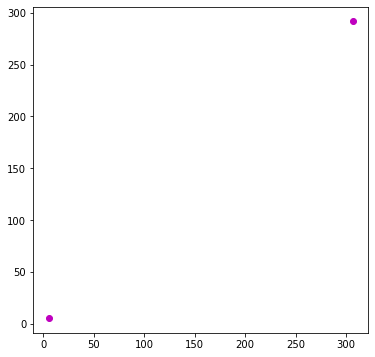

In [115]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(df['Sr20_f0.15'], df['Sr20_f0.2'],'mo')

In [ ]:
# MAP CATCHMENTS